# Proyek Analisis Data: Bike-Sharing-Dataset
- Nama: NAUFAL ULWAN ARRIFQY
- Email: naufalulwanarrifqy@gmail.com
- Id Dicoding: naufal_rifqy

## Menentukan Pertanyaan Bisnis

1. Apakah kondisi cuaca dapat mempengaruhi tingkat penyewaan sepeda?
2. Apakah ada kondisi cuaca ekstrem tertentu yang secara signifikan mempengaruhi jumlah penyewaan?
3. Apakah ada tren atau pola tertentu yang dapat diidentifikasi antara kondisi cuaca dan penyewaan sepeda? 
4. Apakah ada perbedaan jumlah penyewaan sepeda yang signifikan antara musim panas, musim gugur, musim dingin, dan musim semi? 
5. Apakah ada tren terkait dengan musim yang dapat membantu dalam perencanaan kapasitas dan pemasaran?
6. Apakah ada peningkatan antara total penyewaan sepeda pada tahun 2011 dan 2012?
7. Apakah faktor lain seperti hari dalam seminggu, jam dalam sehari, atau bahkan hari libur dapat mempengaruhi tingkat penyewaan sepeda? 
8. Apakah ada pengaruh antara variabel dependen (kolom total) dan variabel independen (temperature, kelembapan, dan kec. angin)?

## Menyaipkan semua library yang dibuthkan

In [243]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [244]:
# Import Data hour.csv
hour_df = pd.read_csv("hour.csv")
hour_df.tail(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17369,17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
17370,17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
17371,17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
17372,17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
17373,17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Assessing Data

Memeriksa dataset hour.csv

- Memeriksa tipe data tiap variabel, duplikasi, missing value, dan anomali data lainya.

In [245]:
#memeriksa tipe data tiap variabel
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [246]:
#cek missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [247]:
#cek null values
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [248]:
#cek duplikasi
hour_df.duplicated().sum()

0

In [249]:
#statistik deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Cleaning data hour.csv

- Mengubah tipe data tanggal dari 'object' ke format tipe data 'date'
- Rename beberapa kolom agar mudah dipahami

In [250]:
#mengganti tipe data
hour_df['dteday'] = pd.to_datetime(hour_df["dteday"])

In [251]:
#cek tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [252]:
#rename kolom agar mudah dipahami
hour_df = hour_df.rename(columns={'dteday': 'datetime',
                                'weathersit': 'weather_cond',
                                'yr': 'year',
                                'mnth': 'month',
                                'hr': 'hour',
                                'cnt': 'total'})

hour_df.head(10)

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


## Exploratory Data Analysis (EDA)

### Explore hour_df

1.Melihat jumlah penyewaan sepeda berdasarkan kondisi cuaca untuk melihat pengaruh cuaca terhadap jumlah sewa sepeda.

In [253]:
#group by weather_cond
hour_df.groupby(by="weather_cond").agg({
    "total": ["sum", "mean"]
})

total            
                  sum        mean
weather_cond                     
1             2338173  204.869272
2              795952  175.165493
3              158331  111.579281
4                 223   74.333333

In [254]:
#melihat tanggal penyewaan pada cuaca kategori 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
hour_df[hour_df['weather_cond'] == 4]

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,total
585,586,2011-01-26,1,0,1,16,0,3,1,4,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,1,1,1,18,0,1,1,4,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,1,1,1,1,0,6,0,4,0.14,0.1364,0.86,0.1940,1,22,23


In [255]:
#melihat total sewa sepeda berdasarkan cuaca dan tahun
hour_df.groupby(by=[hour_df["datetime"].dt.year,hour_df["weather_cond"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
datetime weather_cond                             
2011     1              875053  183733      691320
         2              300519   53809      246710
         3               67495    9709       57786
         4                  36       1          35
2012     1             1463120  279012     1184108
         2              495433   80672      414761
         3               90836   13074       77762
         4                 187       7         180

In [256]:
#melihat total sewa sepeda berdasarkan cuaca dan bulan
hour_df.groupby(by=[hour_df["datetime"].dt.month, hour_df["weather_cond"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
datetime weather_cond                            
1        1              92726    8843       83883
         2              36634    2844       33790
         3               5350     347        5003
         4                223       8         215
2        1             105618   11196       94422
         2              35414    3198       32216
         3              10320     569        9751
3        1             156094   30077      126017
         2              62902   12978       49924
         3               9924    1389        8535
4        1             201563   47314      154249
         2              55301   11997       43304
         3              12230    1491       10739
5        1             233001   54799      178202
         2              78914   17029       61885
         3              19771    3457       16314
6        1             274190   60005      214185
         2              61457   12213       49244
         3              10695    1688        9007
7        1             275693   63869      211824
         2              57146   11669       45477
         3              12109    2619        9490
8        1             258351   54514      203837
         2              75262   13508       61754
         3              17581    4017       13564
9        1             239042   48183      190859
         2              87113   18819       68294
         3              19836    3321       16515
10       1             204467   42720      161747
         2              95330   14392       80938
         3              22555    2648       19907
11       1             176571   28455      148116
         2              68828    7609       61219
         3               9432     539        8893
12       1             120857   12770      108087
         2              81651    8225       73426
         3               8528     698        7830

In [257]:
#melihat total sewa sepeda berdasarkan cuaca dan hari
hour_df.groupby(by=[hour_df["weekday"], hour_df["weather_cond"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
weekday weather_cond                            
0       1             343593  112057      231536
        2              80757   23065       57692
        3              19677    5399       14278
1       1             303497   48438      255059
        2             131883   20253      111630
        3              19959    2087       17872
        4                164       6         158
2       1             326981   42090      284891
        2             114311   12901      101410
        3              27817    2852       24965
3       1             328260   42026      286234
        2             113132   12356      100776
        3              31620    2936       28684
        4                 36       1          35
4       1             354840   48064      306776
        2             112087   11888      100199
        3              18468    1508       16960
5       1             333321   55244      278077
        2             132969   20280      112689
        3              21500    2714       18786
6       1             347681  114826      232855
        2             110813   33738       77075
        3              19290    5287       14003
        4                 23       1          22

In [258]:
#melihat total sewa sepeda berdasarkan cuaca dan jam
hour_df.groupby(by=[hour_df["hour"], hour_df["weather_cond"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
hour weather_cond                           
0    1             28930    5589       23341
     2              8738    1600        7138
     3              1462     186        1276
1    1             16854    3406       13448
     2              6362    1170        5192
...                  ...     ...         ...
22   2             19159    3062       16097
     3              3869     480        3389
23   1             46239    8127       38112
     2             14394    2352       12042
     3              3308     586        2722

[75 rows x 3 columns]

2.Melihat jumlah penyewaan sepeda berdasarkan musim untuk melihat pengaruh musim terhadap jumlah sewa sepeda.

In [259]:
#group by musim
hour_df.groupby(by="season").agg({
    "total": ["sum", "mean"]
})

total            
            sum        mean
season                     
1        471348  111.114569
2        918589  208.344069
3       1061129  236.016237
4        841613  198.868856

In [260]:
print(hour_df.groupby(by="season").total.sum().sort_values(ascending=False))

season
3    1061129
2     918589
4     841613
1     471348
Name: total, dtype: int64


In [261]:
#melihat total sewa sepeda berdasarkan musim dan tahun
hour_df.groupby(by=[hour_df["datetime"].dt.year,hour_df["season"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
datetime season                            
2011     1       150000   21425      128575
         2       347316   77564      269752
         3       419650   95450      324200
         4       326137   52813      273324
2012     1       321348   39197      282151
         2       571273  125958      445315
         3       641479  130641      510838
         4       515476   76969      438507

In [262]:
#melihat total sewa sepeda berdasarkan musim dan bulan
hour_df.groupby(by=[hour_df["datetime"].dt.month,hour_df["season"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
datetime season                            
1        1       134933   12042      122891
2        1       151352   14963      136389
3        1       142065   27154      114911
         2        86855   17290       69565
4        2       269094   60802      208292
5        2       331686   75285      256401
6        2       230954   50145      180809
         3       115388   23761       91627
7        3       344948   78157      266791
8        3       351194   72039      279155
9        3       249599   52134      197465
         4        96392   18189       78203
10       4       322352   59760      262592
11       4       254831   36603      218228
12       1        42998    6463       36535
         4       168038   15230      152808

In [263]:
#melihat total sewa sepeda berdasarkan hari dan musim
hour_df.groupby(by=[hour_df["weekday"],hour_df["season"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
weekday season                            
0       1        60195   14450       45745
        2       129650   48372       81278
        3       138431   47053       91378
        4       115751   30646       85105
1       1        63771    6572       57199
        2       123255   22802      100453
        3       146307   27444      118863
        4       122170   13966      108204
2       1        69813    5868       63945
        2       125449   17418      108031
        3       152715   23371      129344
        4       121132   11186      109946
3       1        65277    5020       60257
        2       130547   17391      113156
        3       158054   24672      133382
        4       119170   10236      108934
4       1        72355    5554       66801
        2       135207   20158      115049
        3       159561   23973      135588
        4       118272   11775      106497
5       1        74264    7353       66911
        2       135792   26006      109786
        3       155267   28114      127153
        4       122467   16765      105702
6       1        65673   15805       49868
        2       138689   51375       87314
        3       150794   51464       99330
        4       122651   35208       87443

In [264]:
#melihat total sewa sepeda berdasarkan jam dan musim
hour_df.groupby(by=[hour_df["hour"],hour_df["season"]]).agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})

total  casual  registered
hour season                           
0    1        4878     604        4274
     2       10459    2282        8177
     3       13822    3093       10729
     4        9971    1396        8575
1    1        3229     416        2813
...            ...     ...         ...
22   4       21871    2702       19169
23   1        7994     814        7180
     2       17661    3581       14080
     3       22986    4739       18247
     4       15300    1931       13369

[96 rows x 3 columns]

3.Melihat total sewa sepeda berdasar tanggal dan jam serta melihat pengaruh hari libur terhadap penyewaan sepeda

In [265]:
#melihat total sewa terbanyak berdasarkan tanggal
hour_df.groupby(by='datetime').agg({
    'casual': 'sum',
    'registered': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

,casual,registered,total
datetime,,,
2012-09-15,3160,5554,8714
2012-09-29,2589,5966,8555
2012-09-22,2512,5883,8395
2012-03-23,2469,5893,8362
2012-05-19,3410,4884,8294
...,...,...,...
2011-03-06,114,491,605
2011-01-26,34,472,506
2012-12-26,9,432,441


In [266]:
#total sewa terbanyak berdasarkan tahun
hour_df.groupby(by=hour_df["datetime"].dt.year).agg({
    'casual': 'sum',
    'registered': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

,casual,registered,total
datetime,,,
2012,372765,1676811,2049576
2011,247252,995851,1243103


In [267]:
#total sewa terbanyak berdasarkan bulan
hour_df.groupby(by=hour_df["datetime"].dt.month).agg({
    'casual': 'sum',
    'registered': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

,casual,registered,total
datetime,,,
8,72039,279155,351194
6,73906,272436,346342
9,70323,275668,345991
7,78157,266791,344948
5,75285,256401,331686
10,59760,262592,322352
4,60802,208292,269094
11,36603,218228,254831
3,44444,184476,228920


In [268]:
#total sewa terbanyak berdasarkan jam
hour_df.groupby(by='hour').agg({
    'casual': 'sum',
    'registered': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

,casual,registered,total
hour,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


In [269]:
#total sewa terbanyak berdasarkan hari
hour_df.groupby(by=hour_df["weekday"]).agg({
    'casual': 'sum',
    'registered': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

,casual,registered,total
weekday,,,
5,78238,409552,487790
4,61460,423935,485395
6,153852,323955,477807
3,57319,415729,473048
2,57843,411266,469109
1,70784,384719,455503
0,140521,303506,444027


In [270]:
#total sewa terbanyak berdasarkan hari libur
hour_df.groupby(by=hour_df["workingday"]).agg({
    'casual': 'sum',
    'registered': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)

,casual,registered,total
workingday,,,
1,303285,1989125,2292410
0,316732,683537,1000269


In [271]:
#korelasi var non kategorik terhadap total sewa
hour_df[['temp',
        'atemp', 
        'hum', 
        'windspeed', 
        'casual', 
        'registered', 
        'total']].corr()

,temp,atemp,hum,windspeed,casual,registered,total
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
total,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


## Visualization & Explanatory Analysis

In [272]:
# setting ukuran canvas plot

sns.set_style('whitegrid')
sns.set_context('talk')
parameter = {'legend.fontsize': 'x-large',
          'figure.figsize': (35, 15),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(parameter)

### Pertanyaan 1:
Apakah kondisi cuaca dapat mempengaruhi tingkat penyewaan sepeda? 

### Pertanyaan 2:
Apakah ada kondisi cuaca ekstrem tertentu yang secara signifikan mempengaruhi jumlah penyewaan?

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '2.33817e+06'),
 Text(0, 0, '795952'),
 Text(0, 0, '158331'),
 Text(0, 0, '223')]

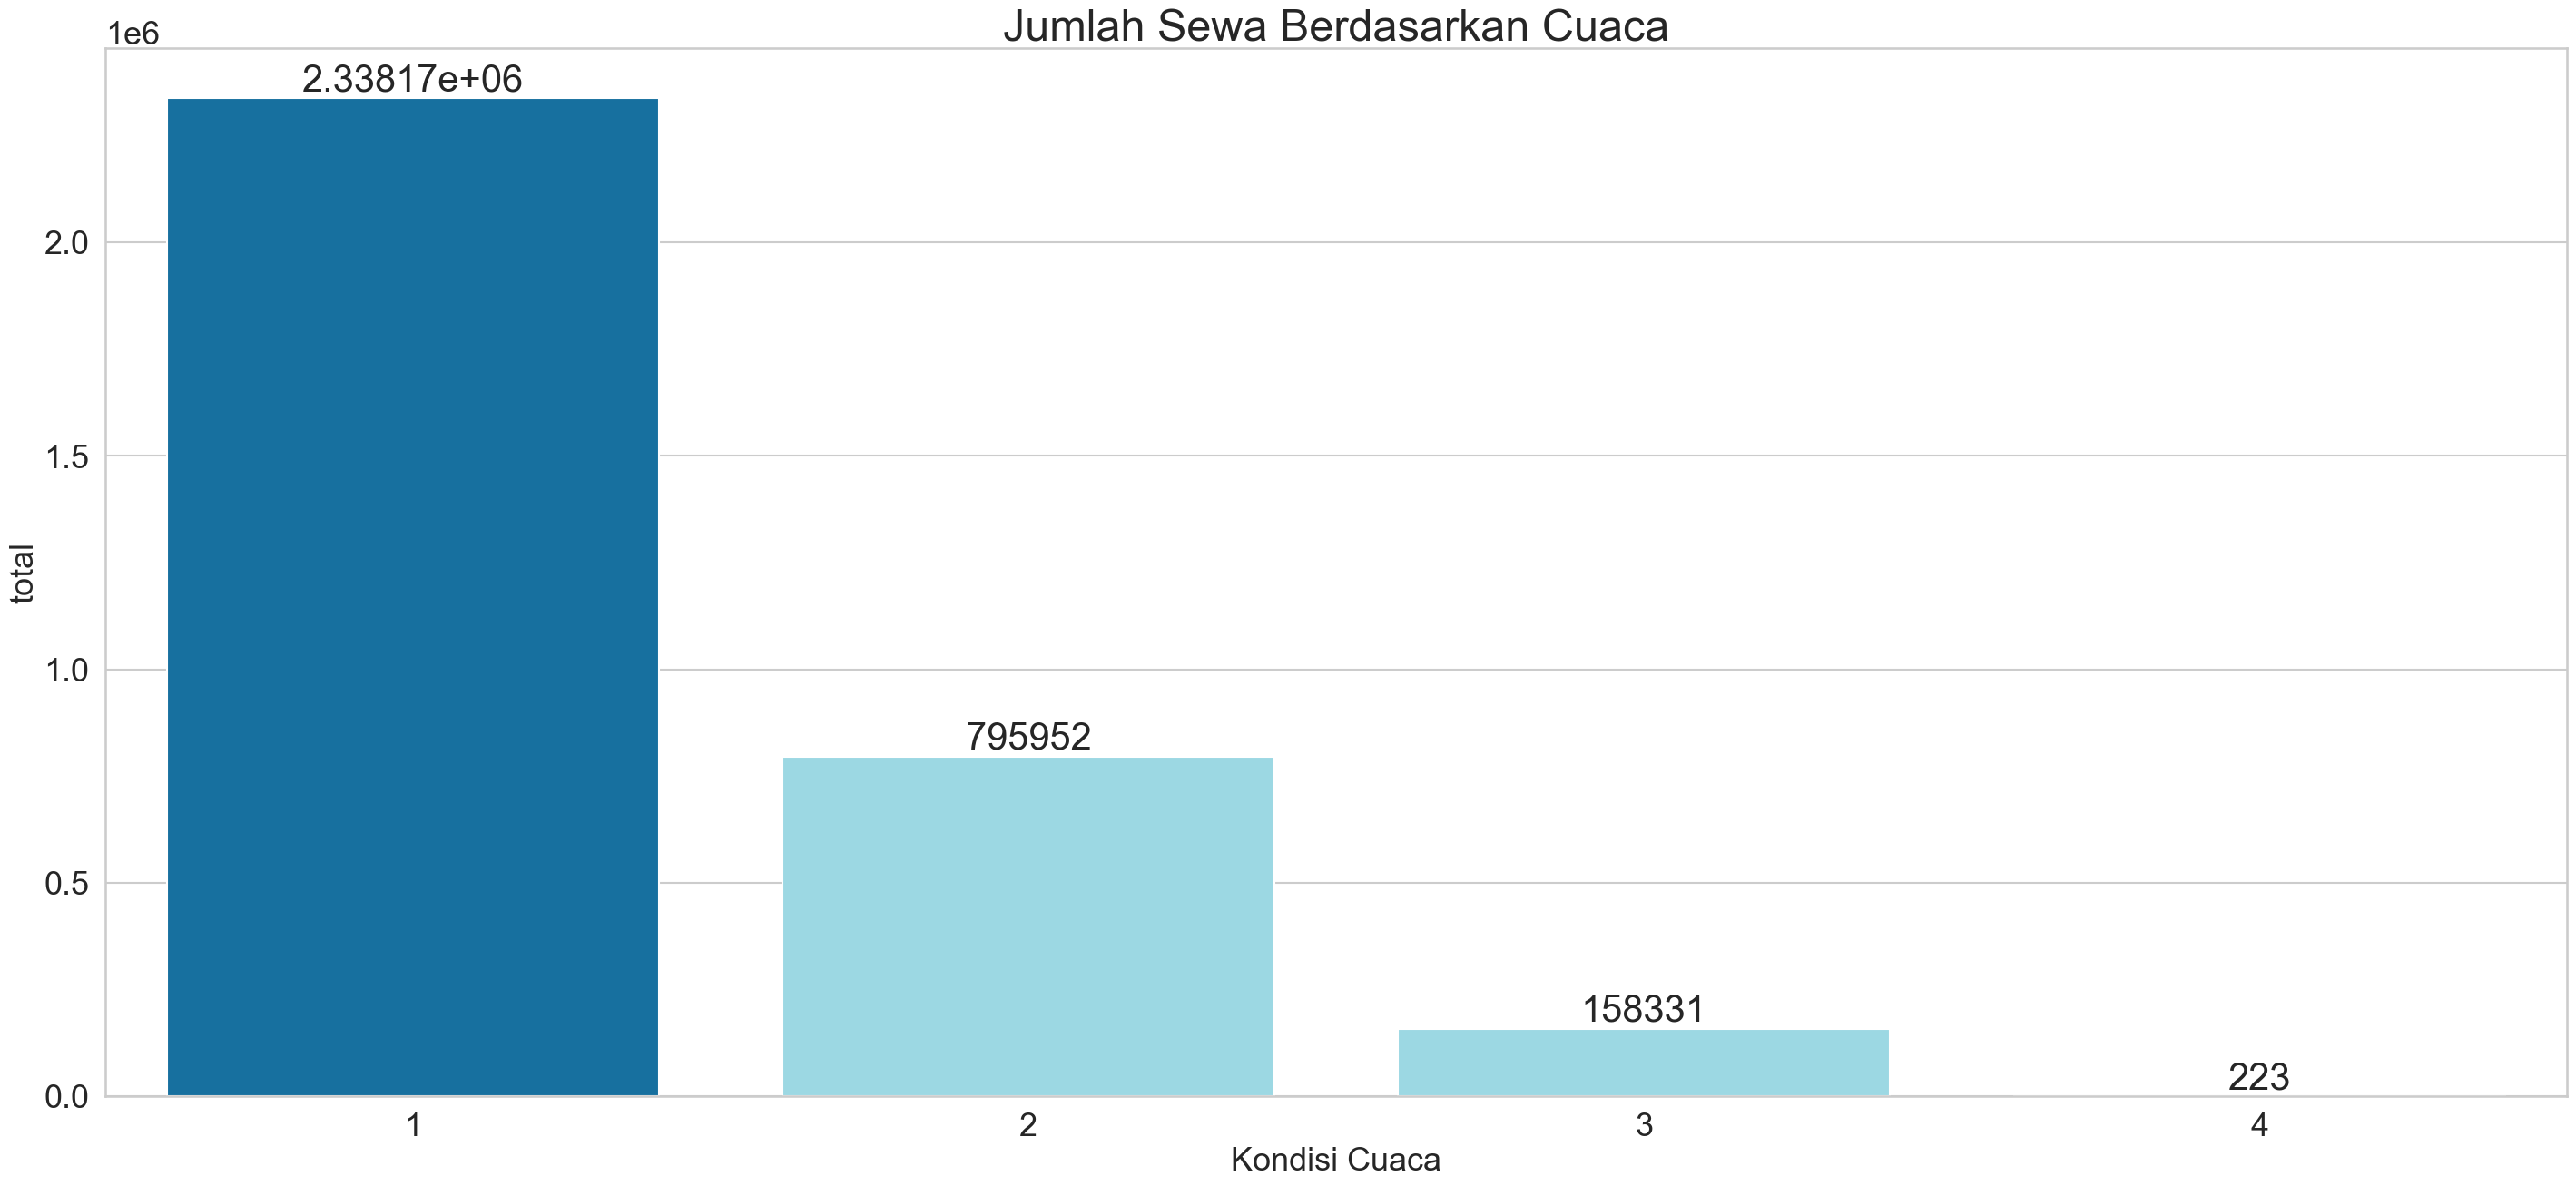

In [273]:
fig,ax = plt.subplots()

colors_a = ["#0077B6", "#90E0EF", "#90E0EF", "#90E0EF", "#90E0EF", "#90E0EF", "#90E0EF", "#90E0EF", "#90E0EF", "#90E0EF", "#90E0EF", "#90E0EF"]

sns.barplot(data= hour_df.groupby(by="weather_cond").agg({
            "total": "sum"
            }).reset_index(),
            x='weather_cond',
            y='total',
            palette=colors_a,
            ax=ax
            )

ax.set_title('Jumlah Sewa Berdasarkan Cuaca', fontsize=35)
ax.set_xlabel('Kondisi Cuaca')
ax.bar_label(ax.containers[0], fontsize=30)


C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

[Text(0, 0, '875053'),
 Text(0, 0, '300519'),
 Text(0, 0, '67495'),
 Text(0, 0, '36')]

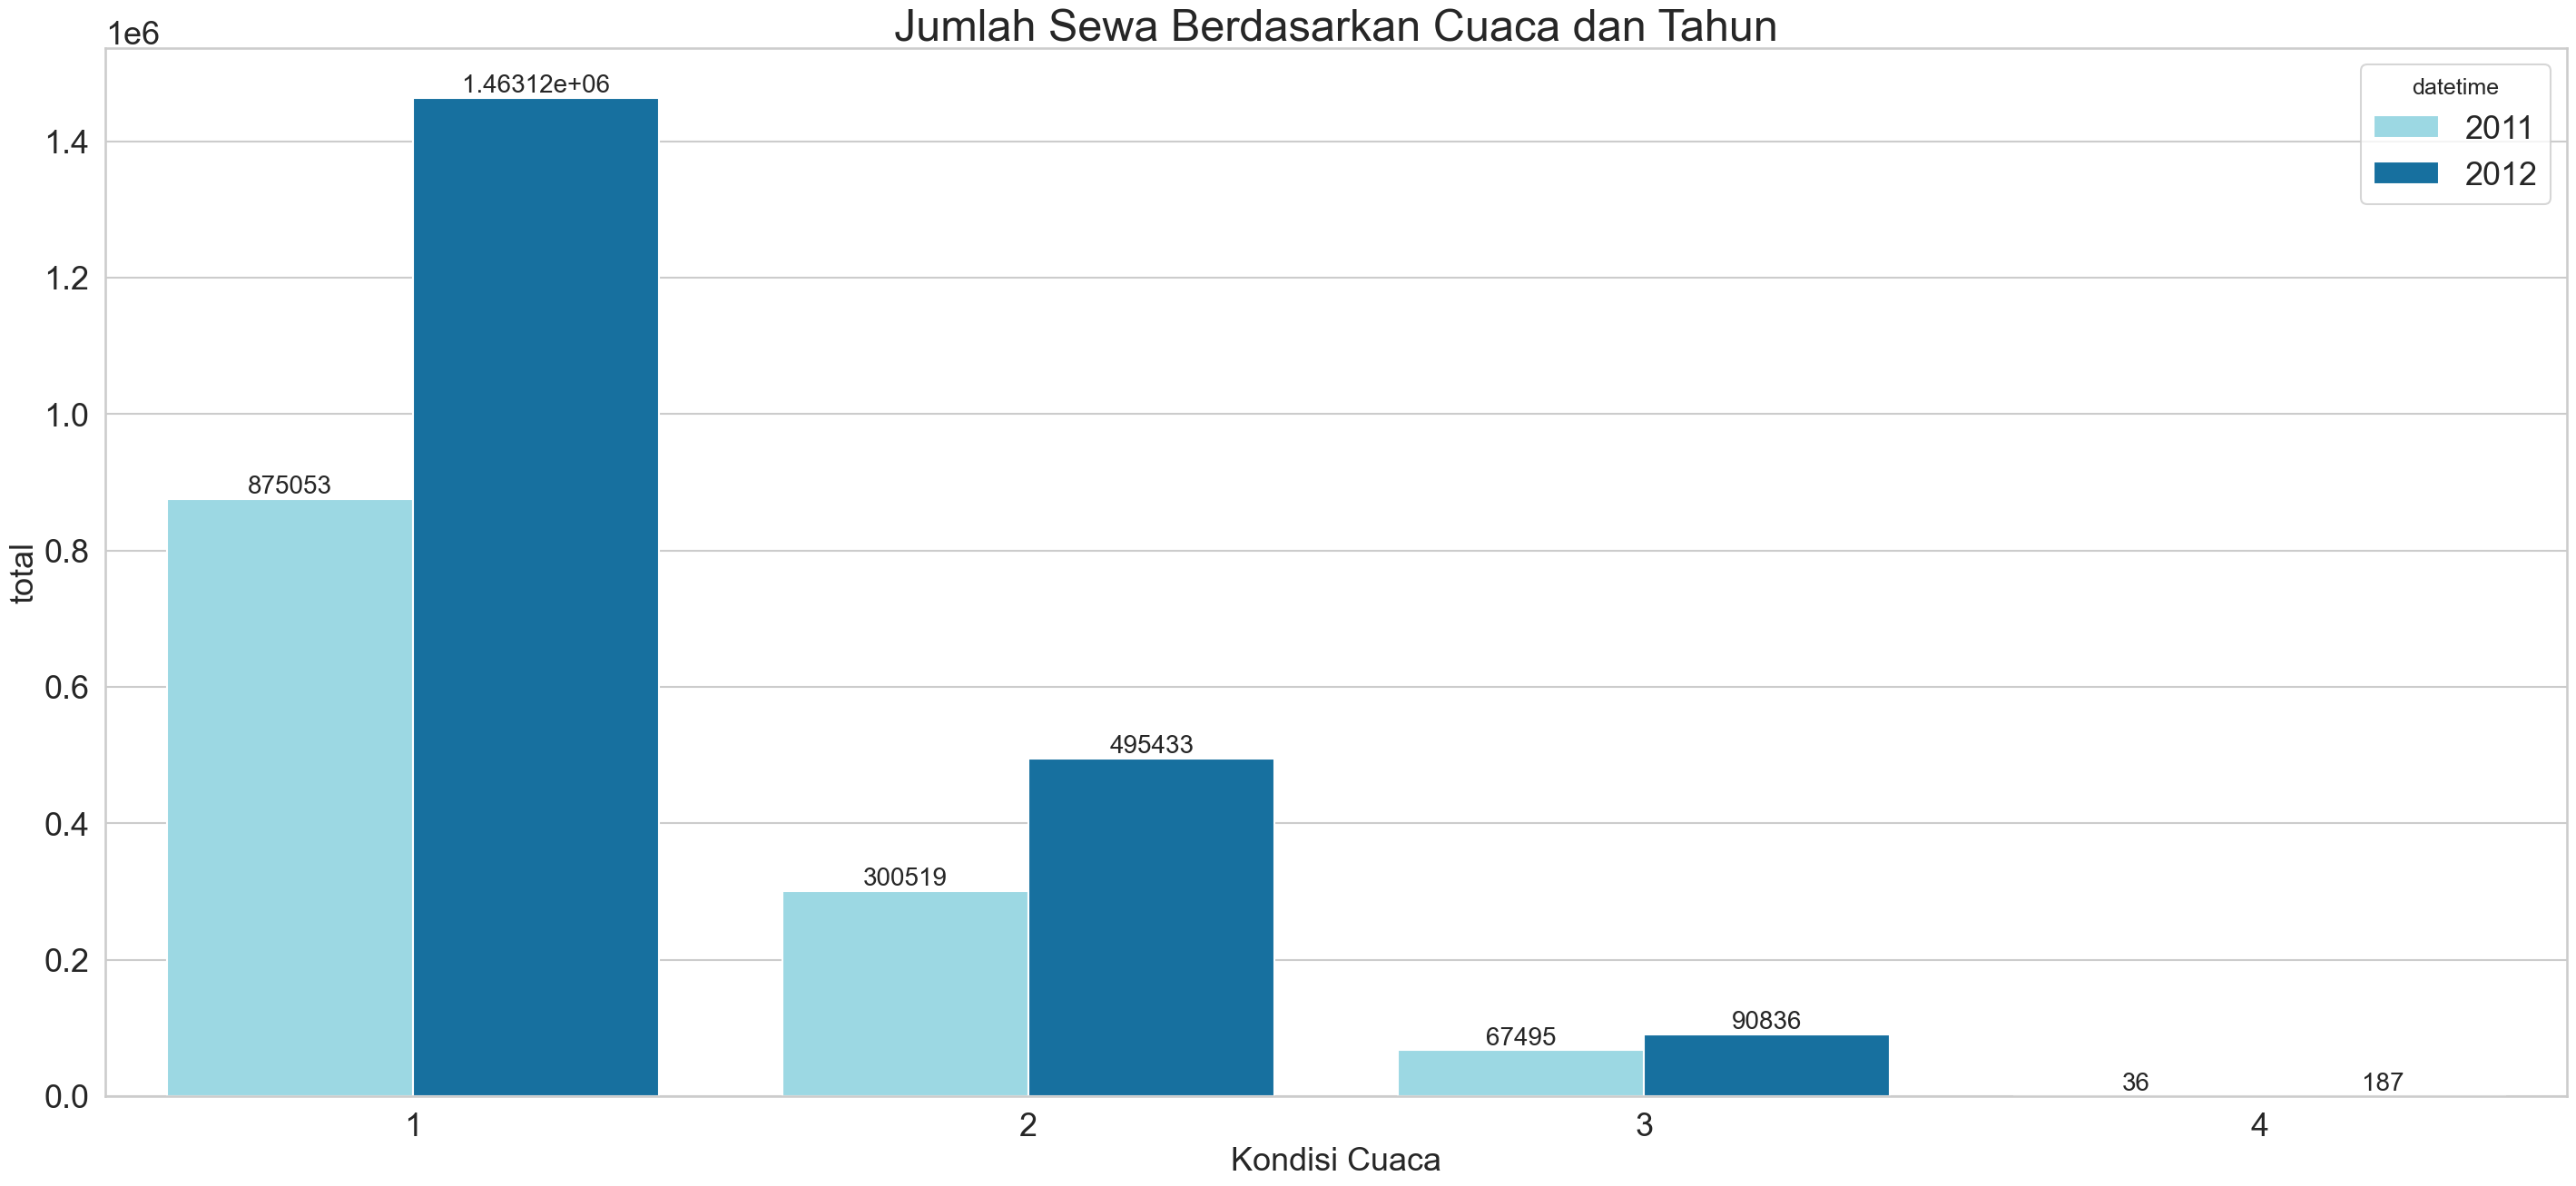

In [274]:
fig,ax = plt.subplots()

date_colors = {"2011": "#90E0EF", "2012": "#0077B6"}

sns.barplot(data=hour_df.groupby(by=[hour_df["datetime"].dt.year.astype(str),hour_df["weather_cond"]]).agg({
            "total": "sum"
            }).reset_index(),
            x='weather_cond',
            y='total',
            hue='datetime',
            palette=date_colors,
            ax=ax)

ax.set_title('Jumlah Sewa Berdasarkan Cuaca dan Tahun', fontsize=35)
ax.set_xlabel('Kondisi Cuaca')
ax.bar_label(ax.containers[1], fontsize=20)
ax.bar_label(ax.containers[0], fontsize=20)

### Pertanyaan 3:
Apakah ada tren atau pola tertentu yang dapat diidentifikasi antara cuaca dan jumlah penyewaan sepeda? 

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

Text(0.5, 0, 'Bulan')

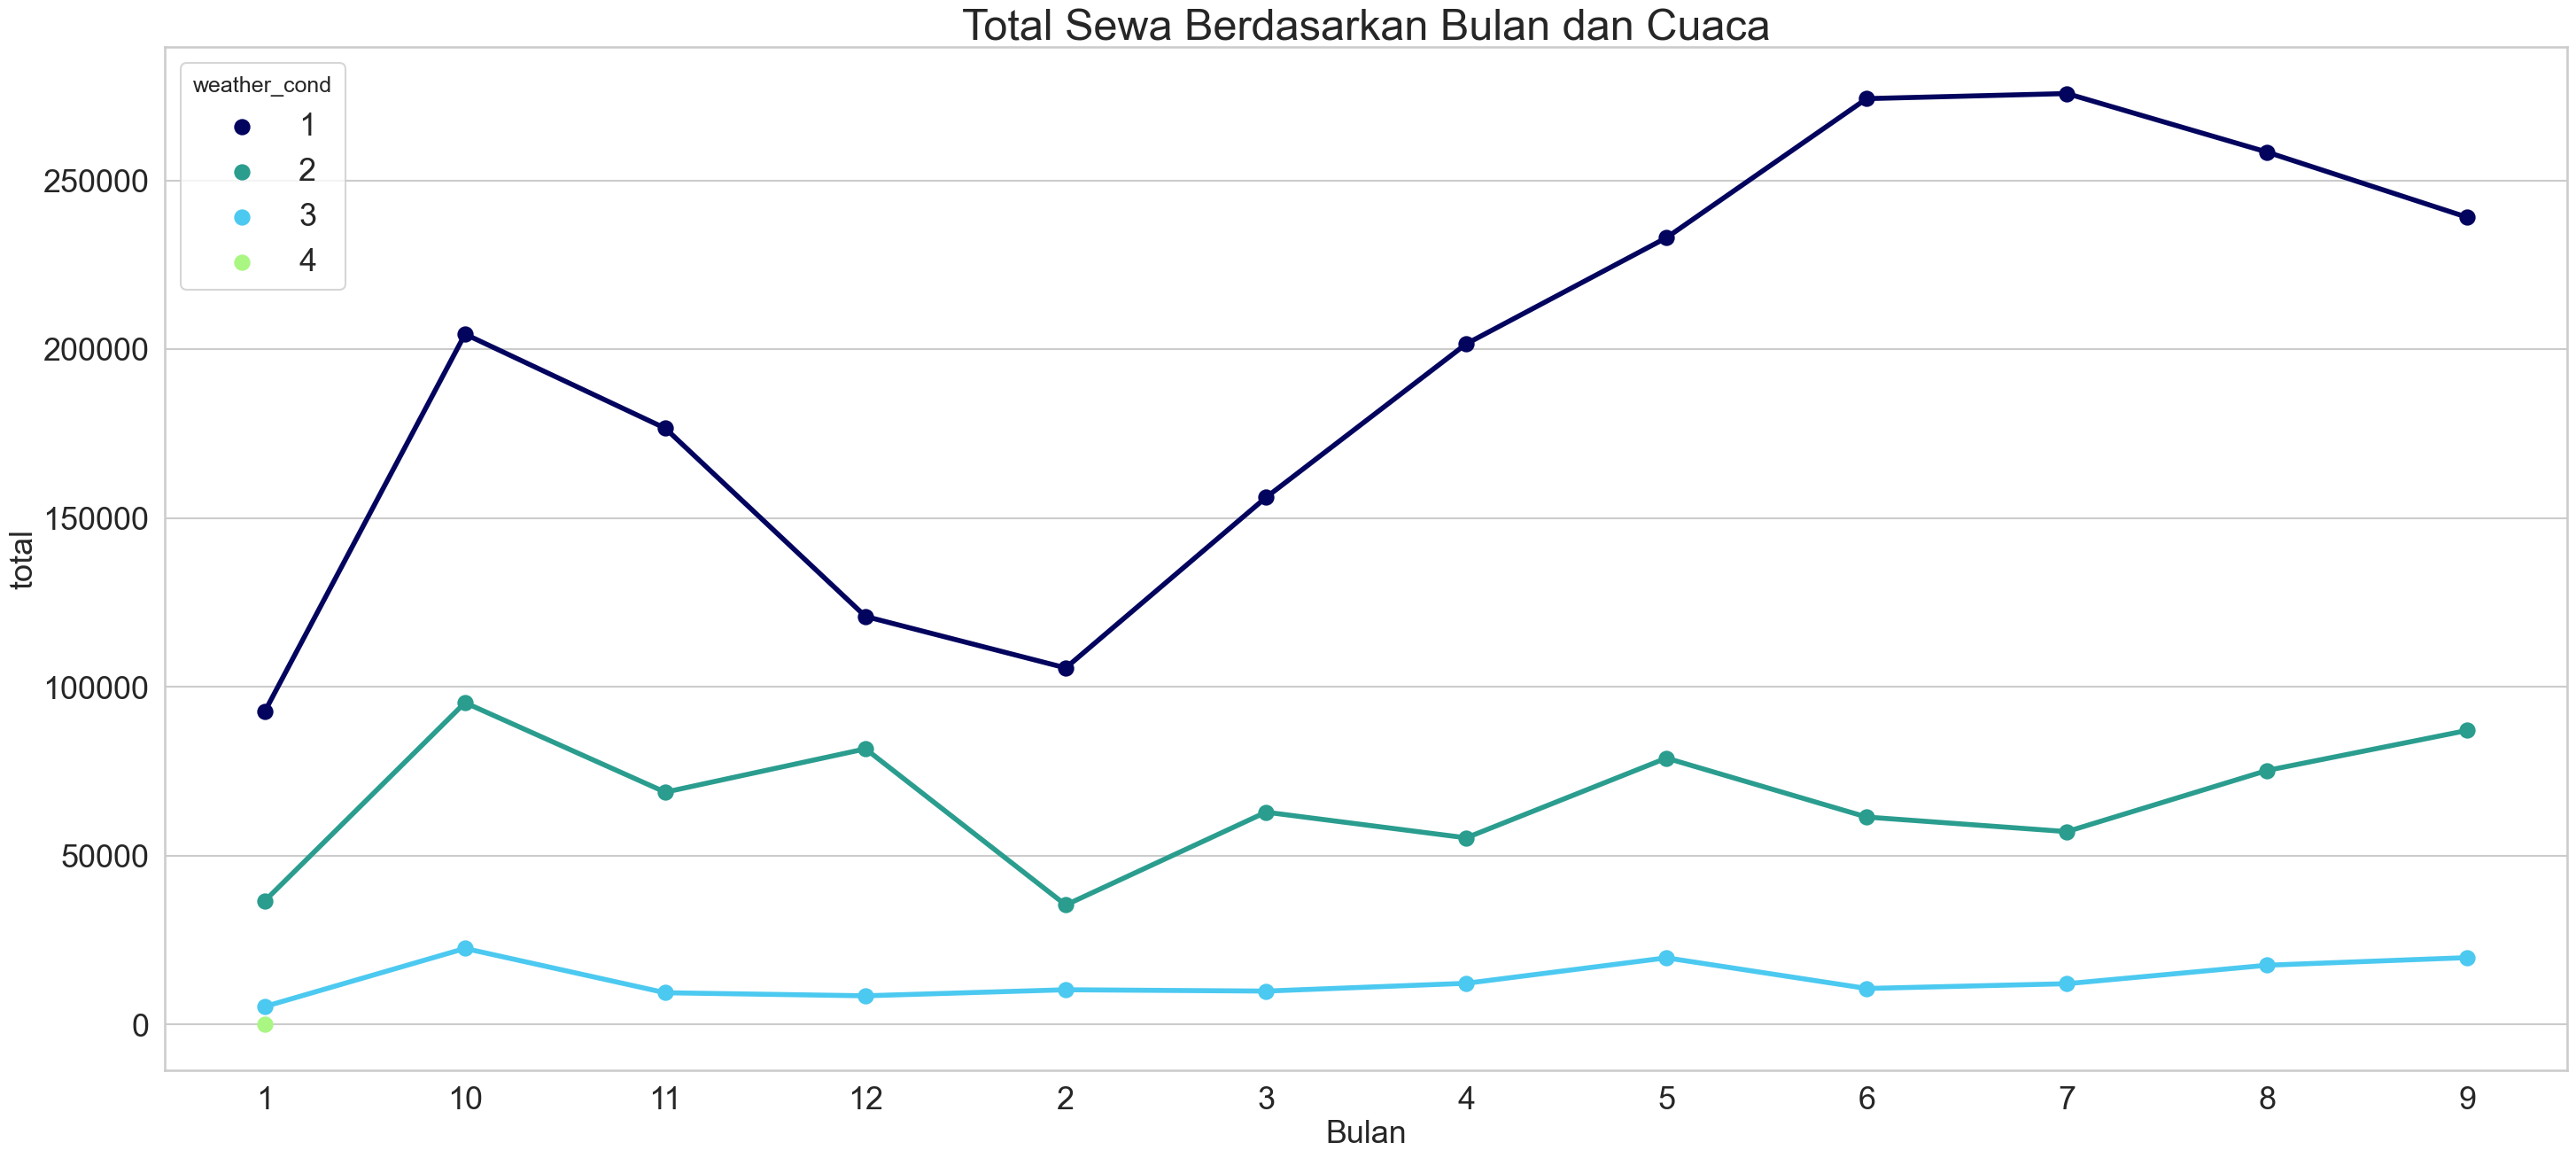

In [275]:
fig,ax = plt.subplots()

weather_colors = {"1": "#03045e", "2": "#2a9d8f", "3": "#4cc9f0",  "4": "#aaf683"}

sns.pointplot(data=hour_df.groupby(by=[hour_df["datetime"].dt.month.astype(str),hour_df["weather_cond"].astype(str)]).agg({
                "total": "sum"
             }).reset_index(),
              x='datetime',
              y='total',
              hue='weather_cond',
              palette=weather_colors,
              ax=ax)

ax.set_title('Total Sewa Berdasarkan Bulan dan Cuaca', fontsize=35)
ax.set_xlabel('Bulan')

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Hari')

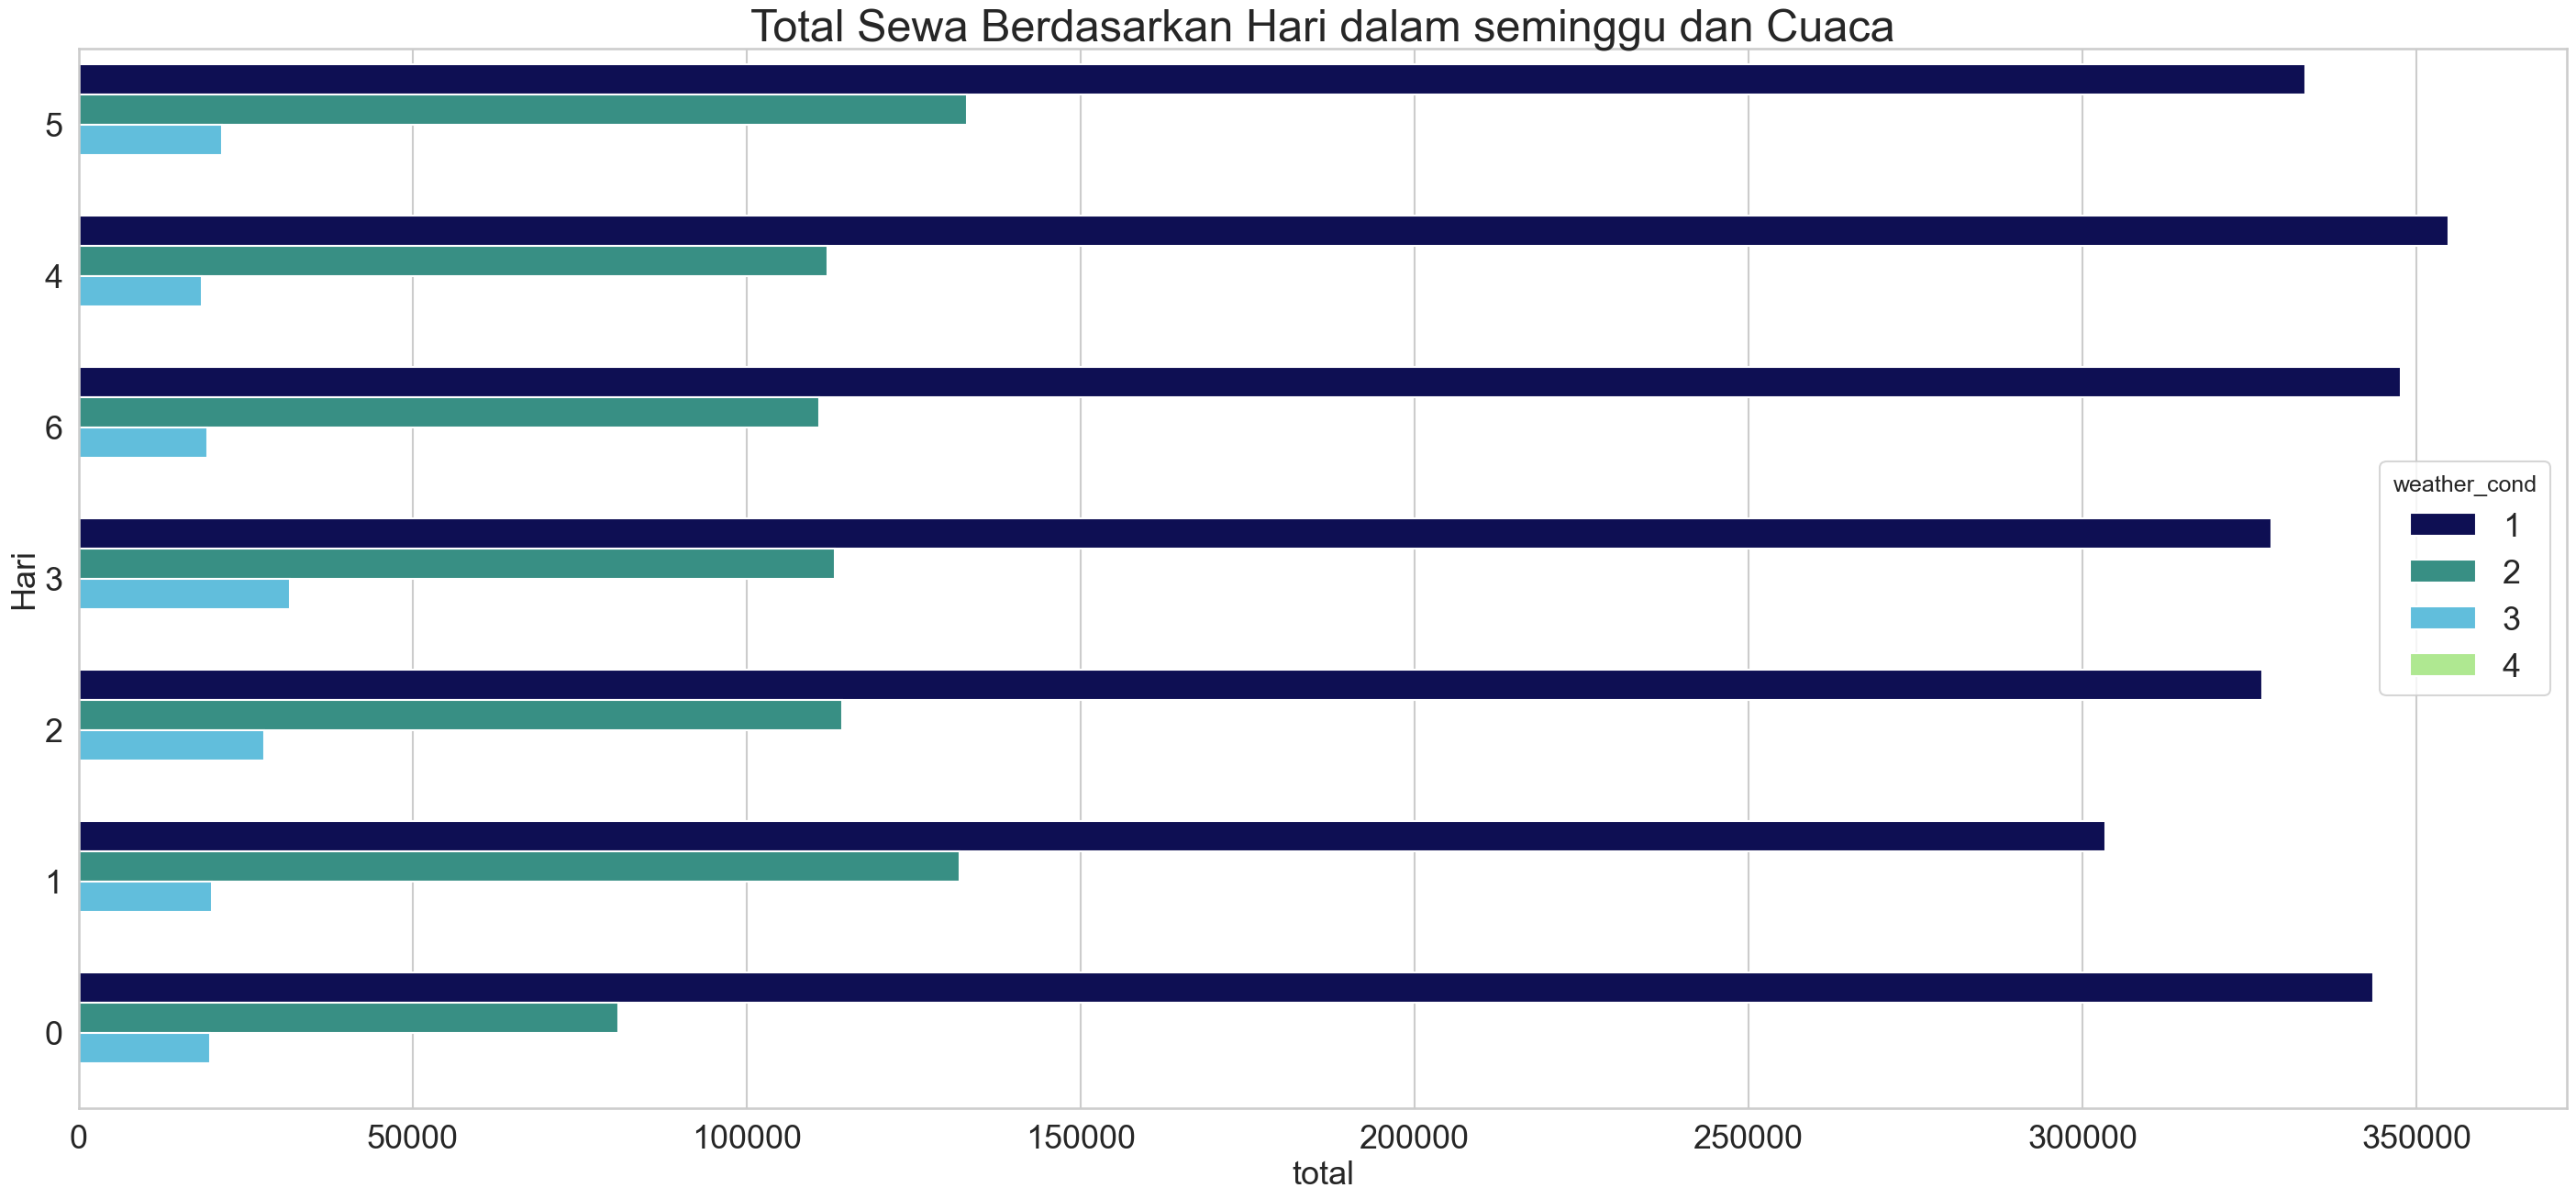

In [276]:
#mengubah tipe data weekday & weather_cond ke string
hour_df['weekday'] = hour_df.weekday.astype('str')
hour_df['weather_cond'] = hour_df.weather_cond.astype('str')

weather_colors = {"1": "#03045e", "2": "#2a9d8f", "3": "#4cc9f0",  "4": "#aaf683"}

fig,ax = plt.subplots()
sns.barplot(data=hour_df.groupby(by=[hour_df["weekday"],hour_df["weather_cond"]]).agg({
                "total": "sum"
                }).reset_index(),
              x='total',
              y='weekday',
              hue='weather_cond',
              palette=weather_colors,
              ax=ax,
              order=hour_df.groupby("weekday")["total"].sum().sort_values(ascending=False).index)

ax.set_title('Total Sewa Berdasarkan Hari dalam seminggu dan Cuaca', fontsize=35)
ax.set_ylabel('Hari')

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

Text(0.5, 0, 'Jam')

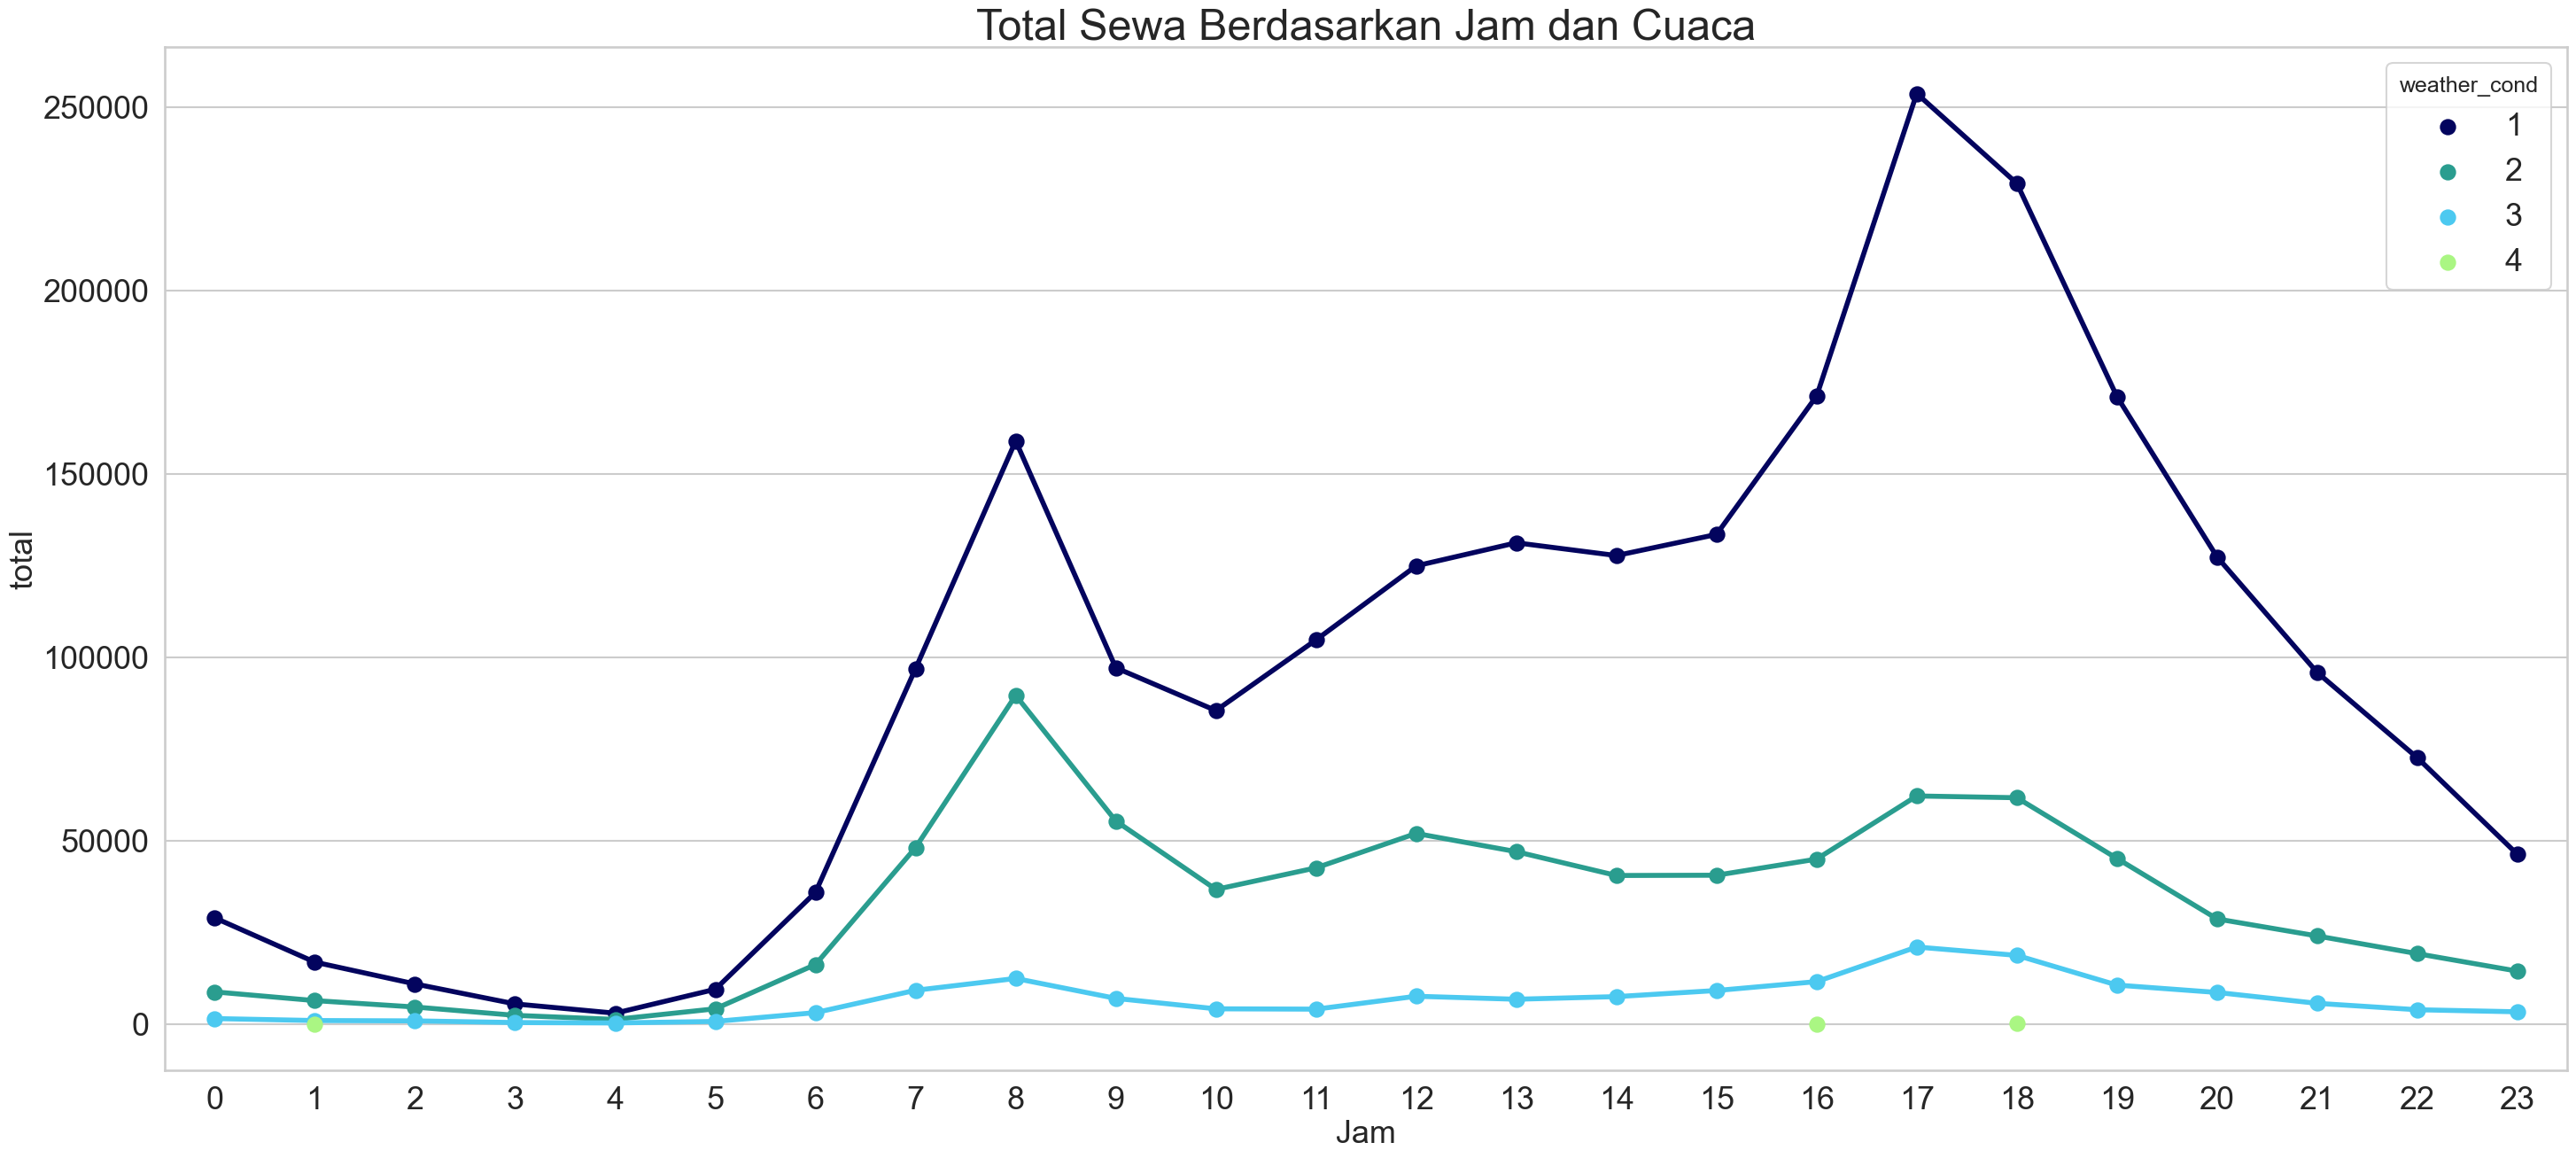

In [277]:
fig,ax = plt.subplots()

weather_colors = {"1": "#03045e", "2": "#2a9d8f", "3": "#4cc9f0",  "4": "#aaf683"}

sns.pointplot(data=hour_df.groupby(by=[hour_df["hour"], hour_df['weather_cond']]).agg({
                "total": "sum"
                }).reset_index(),
              x='hour',
              y='total',
              hue='weather_cond',
              palette=weather_colors,
              ax=ax)

ax.set_title('Total Sewa Berdasarkan Jam dan Cuaca', fontsize=35)
ax.set_xlabel('Jam')

### Pertanyaan 4: 
Apakah ada perbedaan jumlah penyewaan sepeda yang signifikan antara musim panas, musim gugur, musim dingin, dan musim semi? 

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '1.06113e+06'),
 Text(0, 0, '918589'),
 Text(0, 0, '841613'),
 Text(0, 0, '471348')]

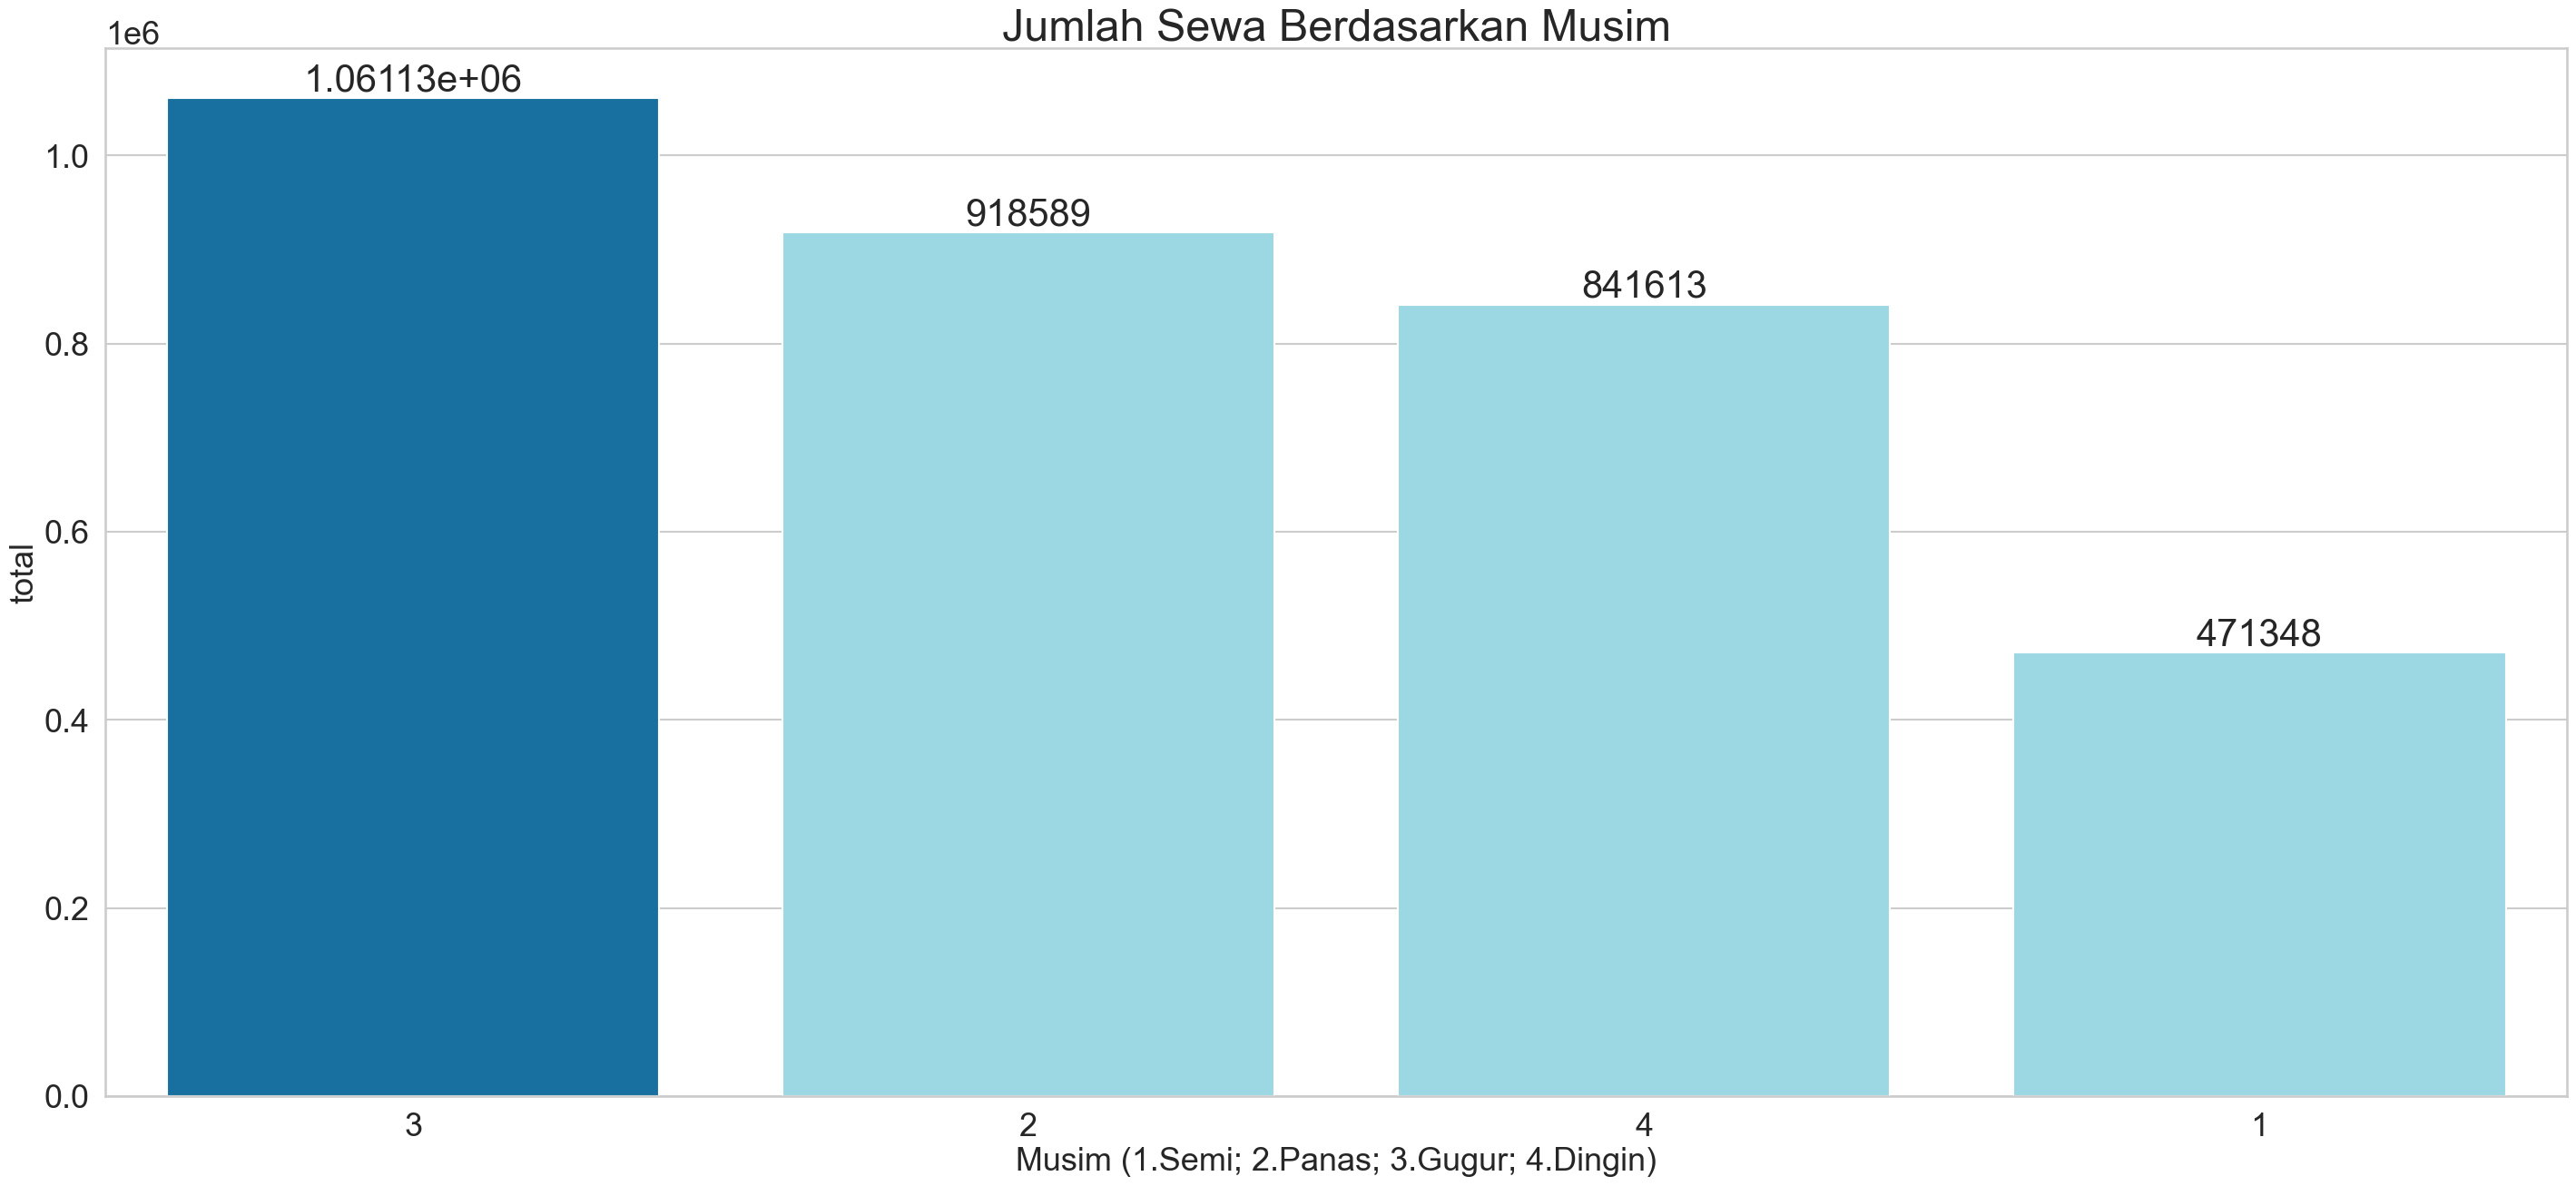

In [278]:
hour_df['season'] = hour_df.season.astype('str')
fig,ax = plt.subplots()

sns.barplot(data= hour_df.groupby(by="season").agg({
            "total": "sum"
            }).sort_values(by="total", ascending=False).reset_index(),
            x='season',
            y='total',
            palette=colors_a,
            ax=ax
            )

ax.set_title('Jumlah Sewa Berdasarkan Musim', fontsize=35)
ax.set_xlabel('Musim (1.Semi; 2.Panas; 3.Gugur; 4.Dingin)')
ax.bar_label(ax.containers[0], fontsize=30)

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '419650'),
 Text(0, 0, '347316'),
 Text(0, 0, '326137'),
 Text(0, 0, '150000')]

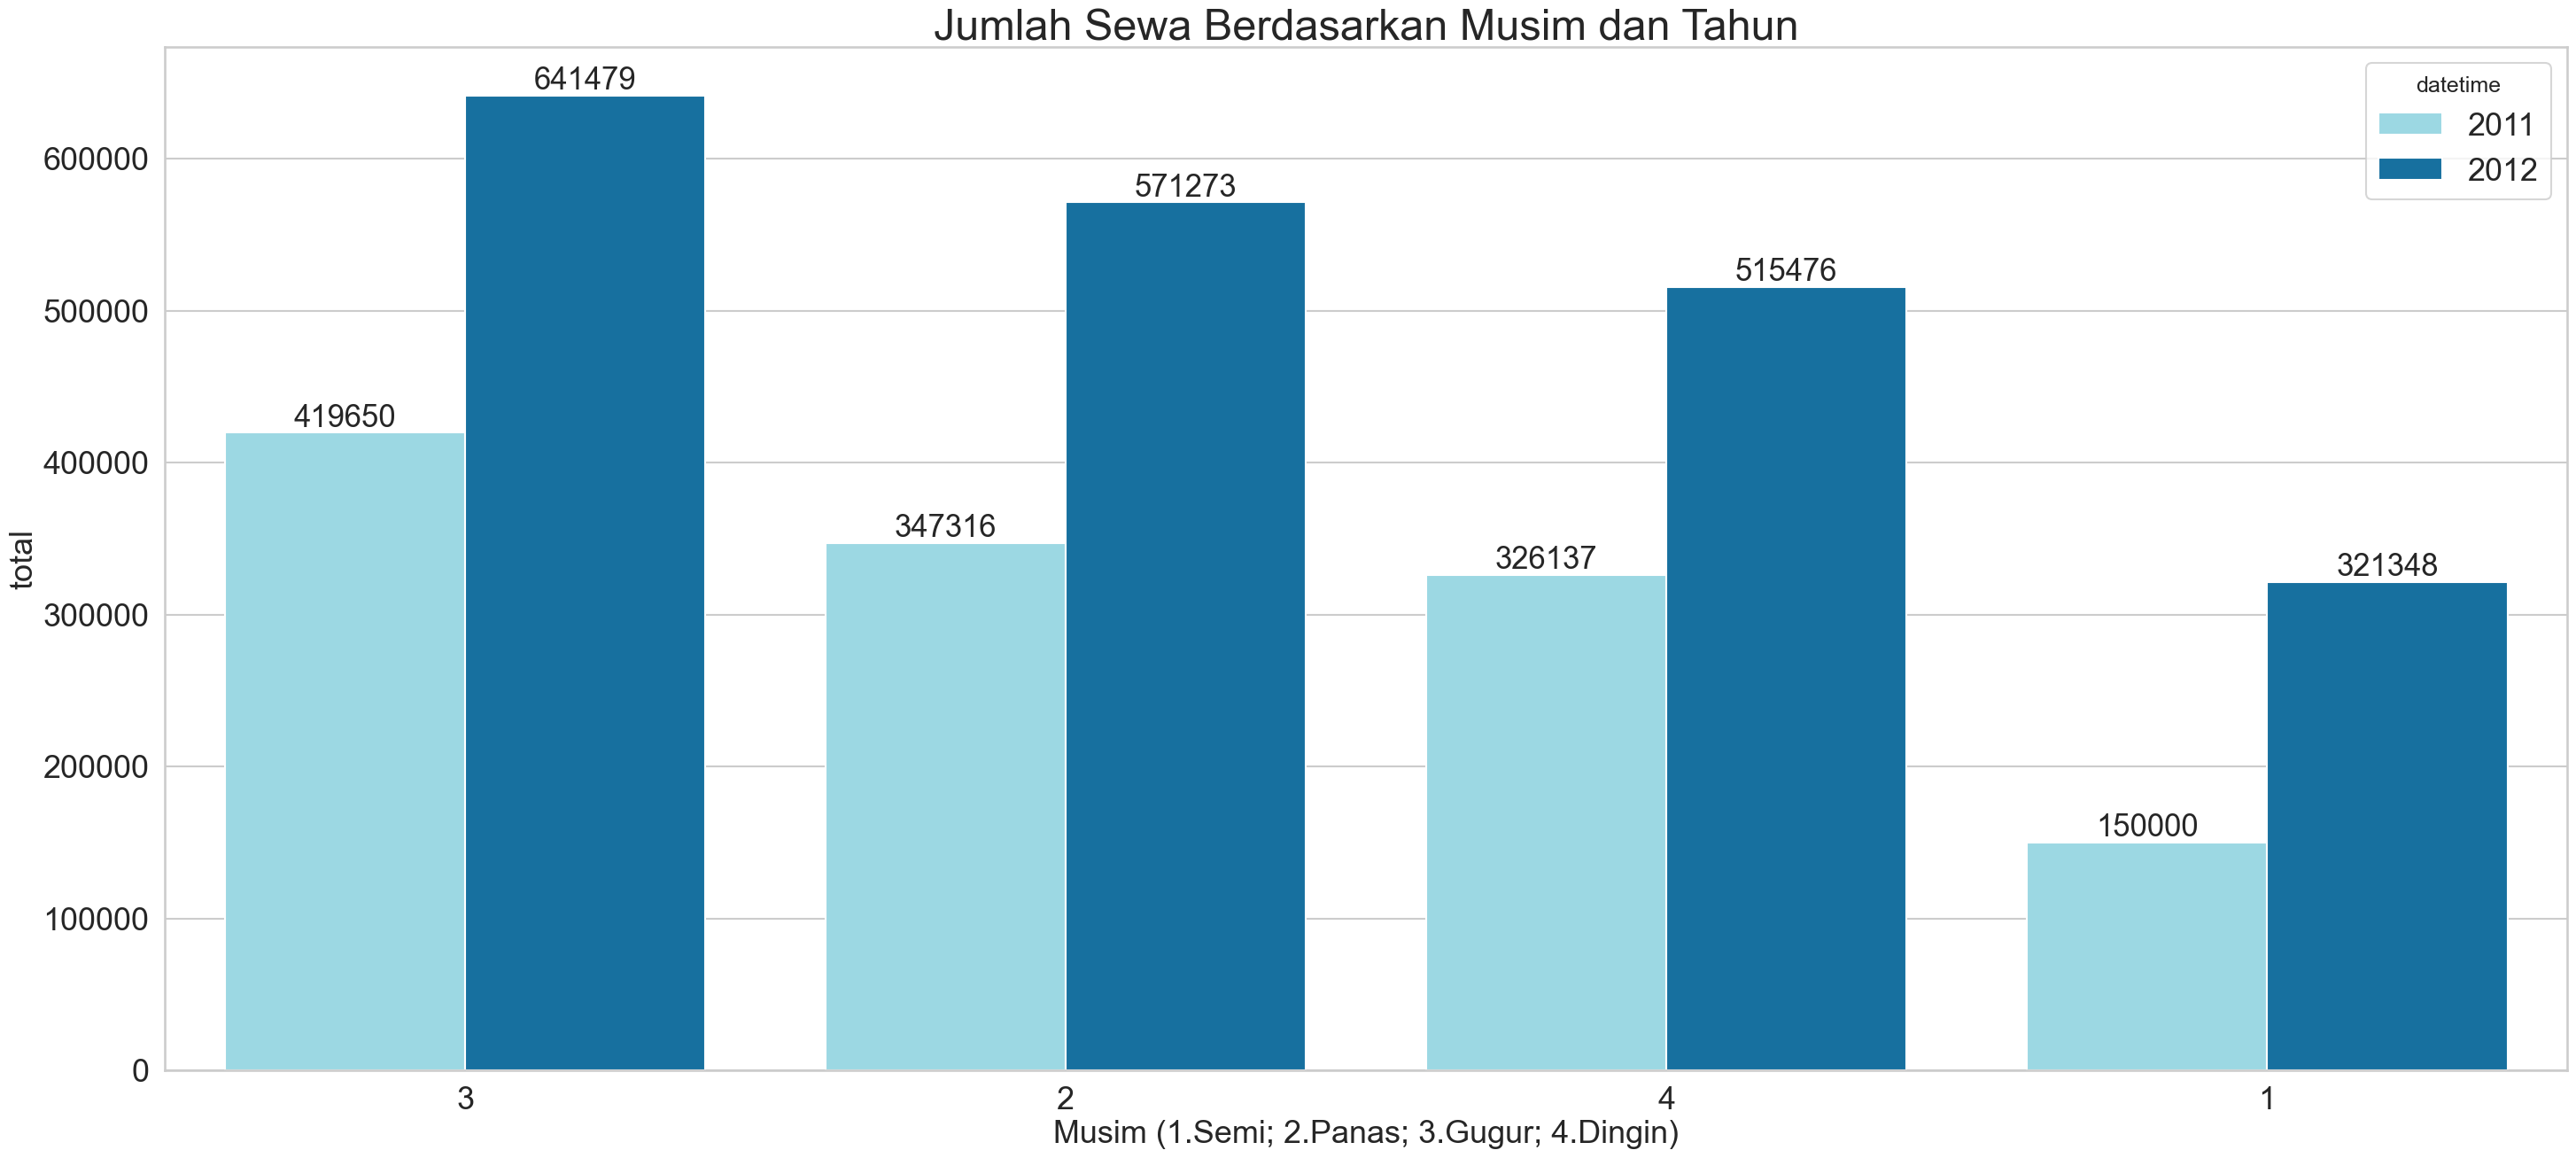

In [279]:


fig,ax = plt.subplots()
sns.barplot(data=hour_df.groupby(by=[hour_df["datetime"].dt.year.astype(str),hour_df["season"]]).agg({
            "total": "sum"
            }).reset_index(),
            x='season',
            y='total',
            hue='datetime',
            palette=date_colors,
            ax=ax,
            order=hour_df.groupby("season")["total"].sum().sort_values(ascending=False).index)

ax.set_title('Jumlah Sewa Berdasarkan Musim dan Tahun', fontsize=35)
ax.set_xlabel('Musim (1.Semi; 2.Panas; 3.Gugur; 4.Dingin)')
ax.bar_label(ax.containers[1], fontsize=25)
ax.bar_label(ax.containers[0], fontsize=25)

### Pertanyaan 5:
Apakah ada tren terkait dengan musim yang dapat membantu dalam perencanaan kapasitas dan pemasaran?

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

Text(0, 0.5, 'Hari')

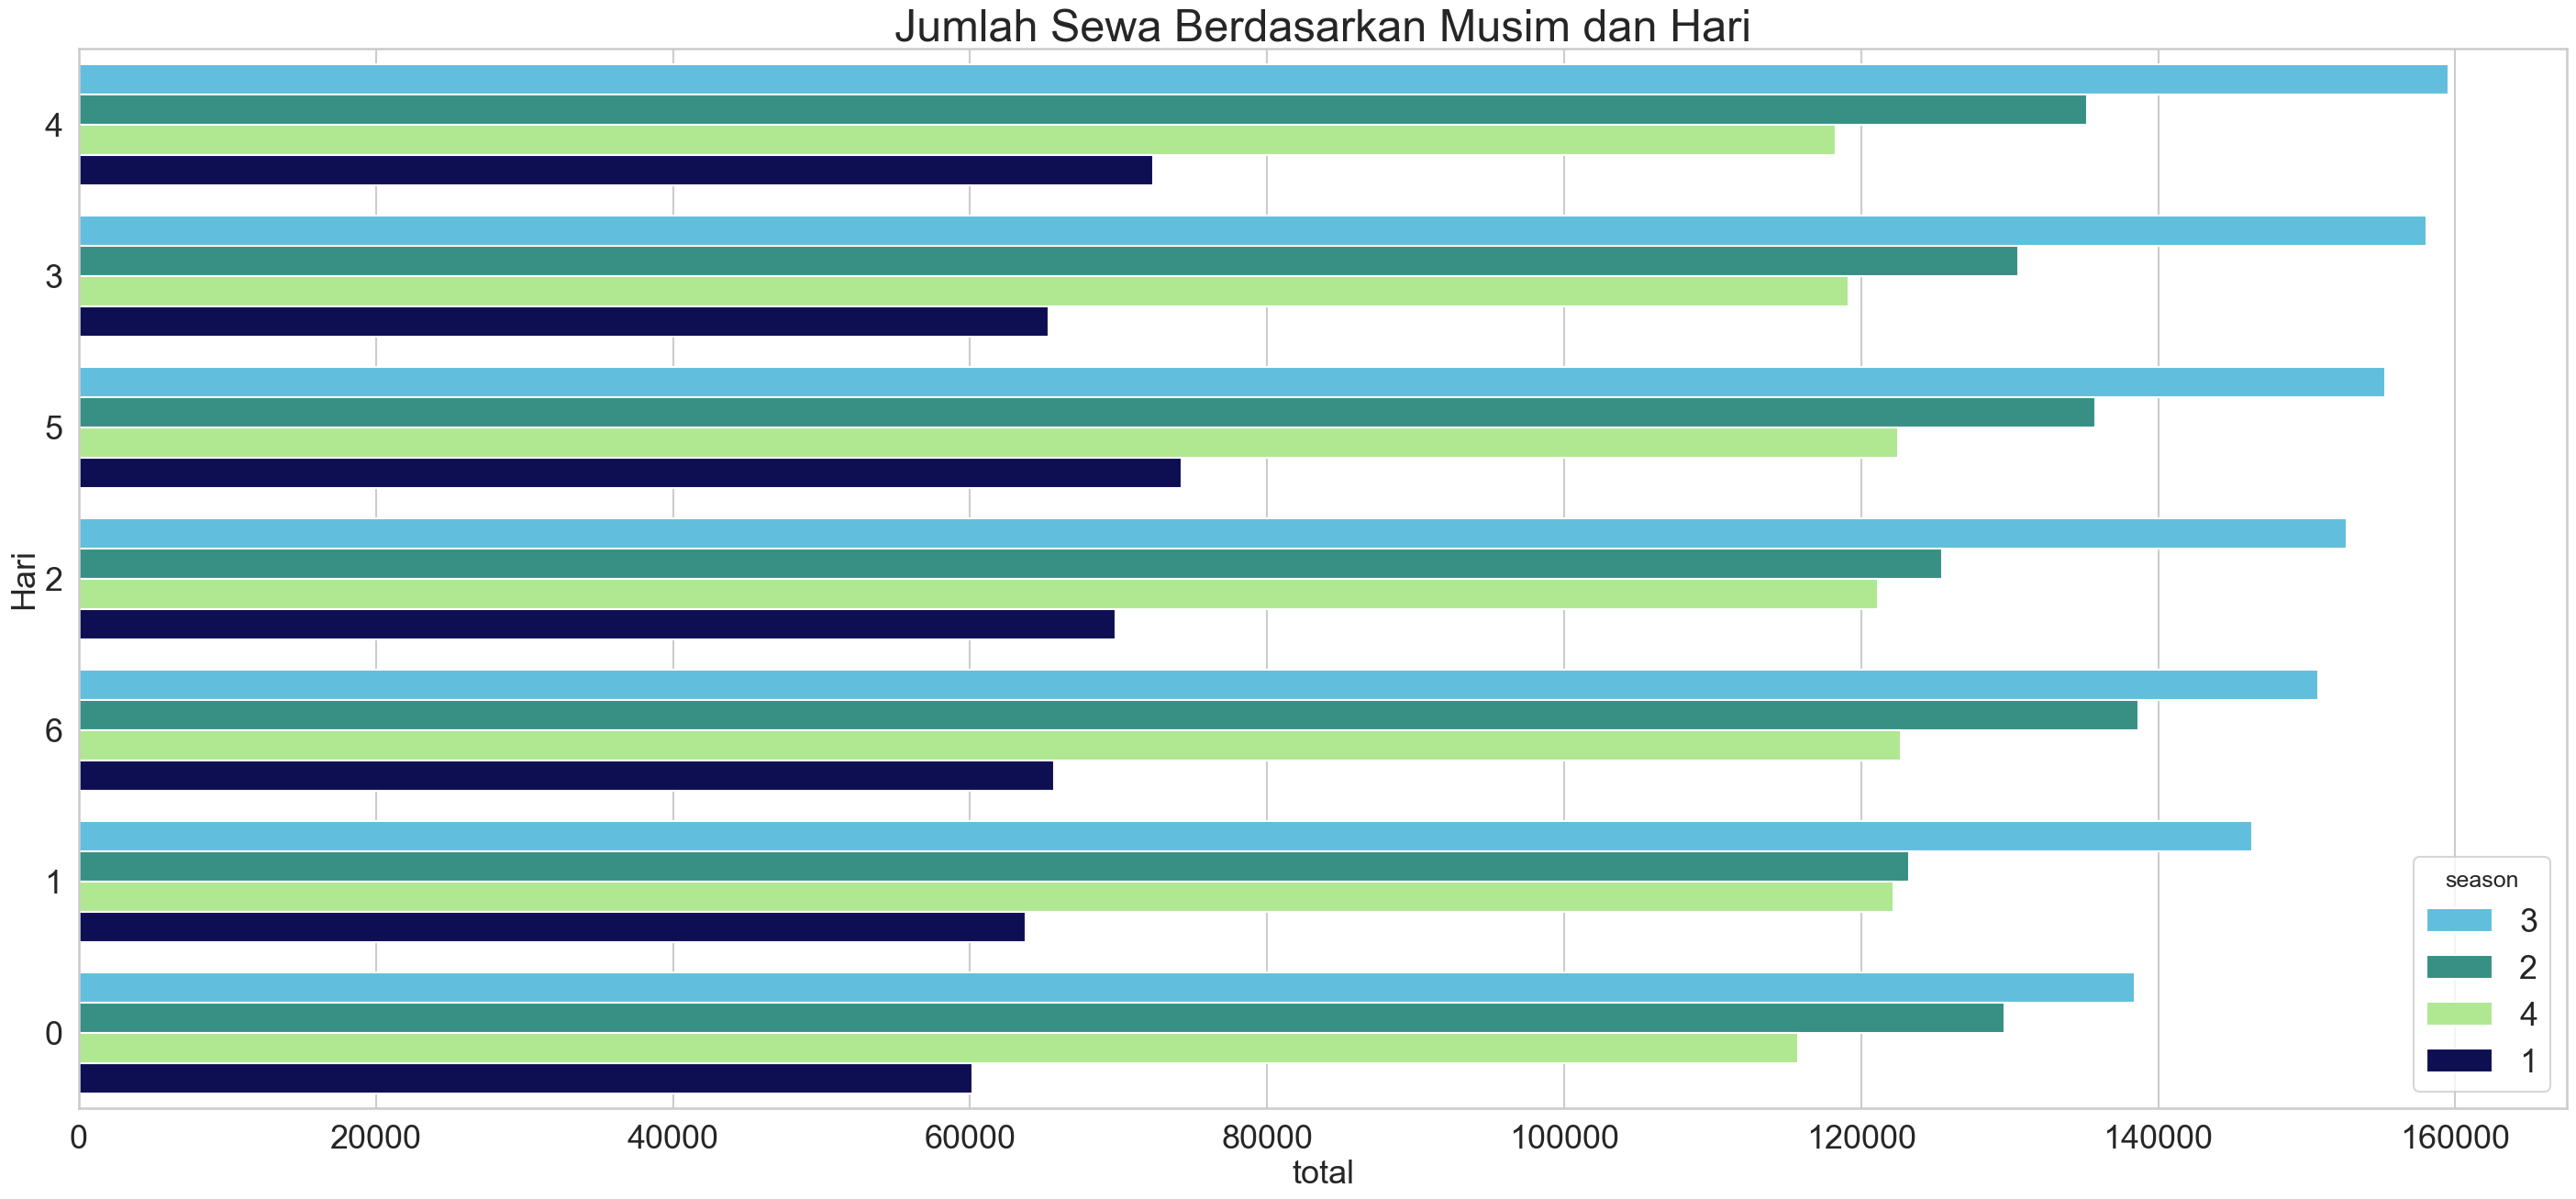

In [280]:
fig,ax = plt.subplots()

season_colors = {"1": "#03045e", "2": "#2a9d8f", "3": "#4cc9f0",  "4": "#aaf683"}

sns.barplot(data=hour_df.groupby(by=[hour_df["weekday"],hour_df["season"]]).agg({
            "total": "sum"
            }).sort_values(by="total", ascending=False).reset_index(),
            x='total',
            y='weekday',
            hue='season',
            palette=season_colors,
            ax=ax)

ax.set_title('Jumlah Sewa Berdasarkan Musim dan Hari', fontsize=35)
ax.set_ylabel('Hari')

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

Text(0.5, 0, 'Jam')

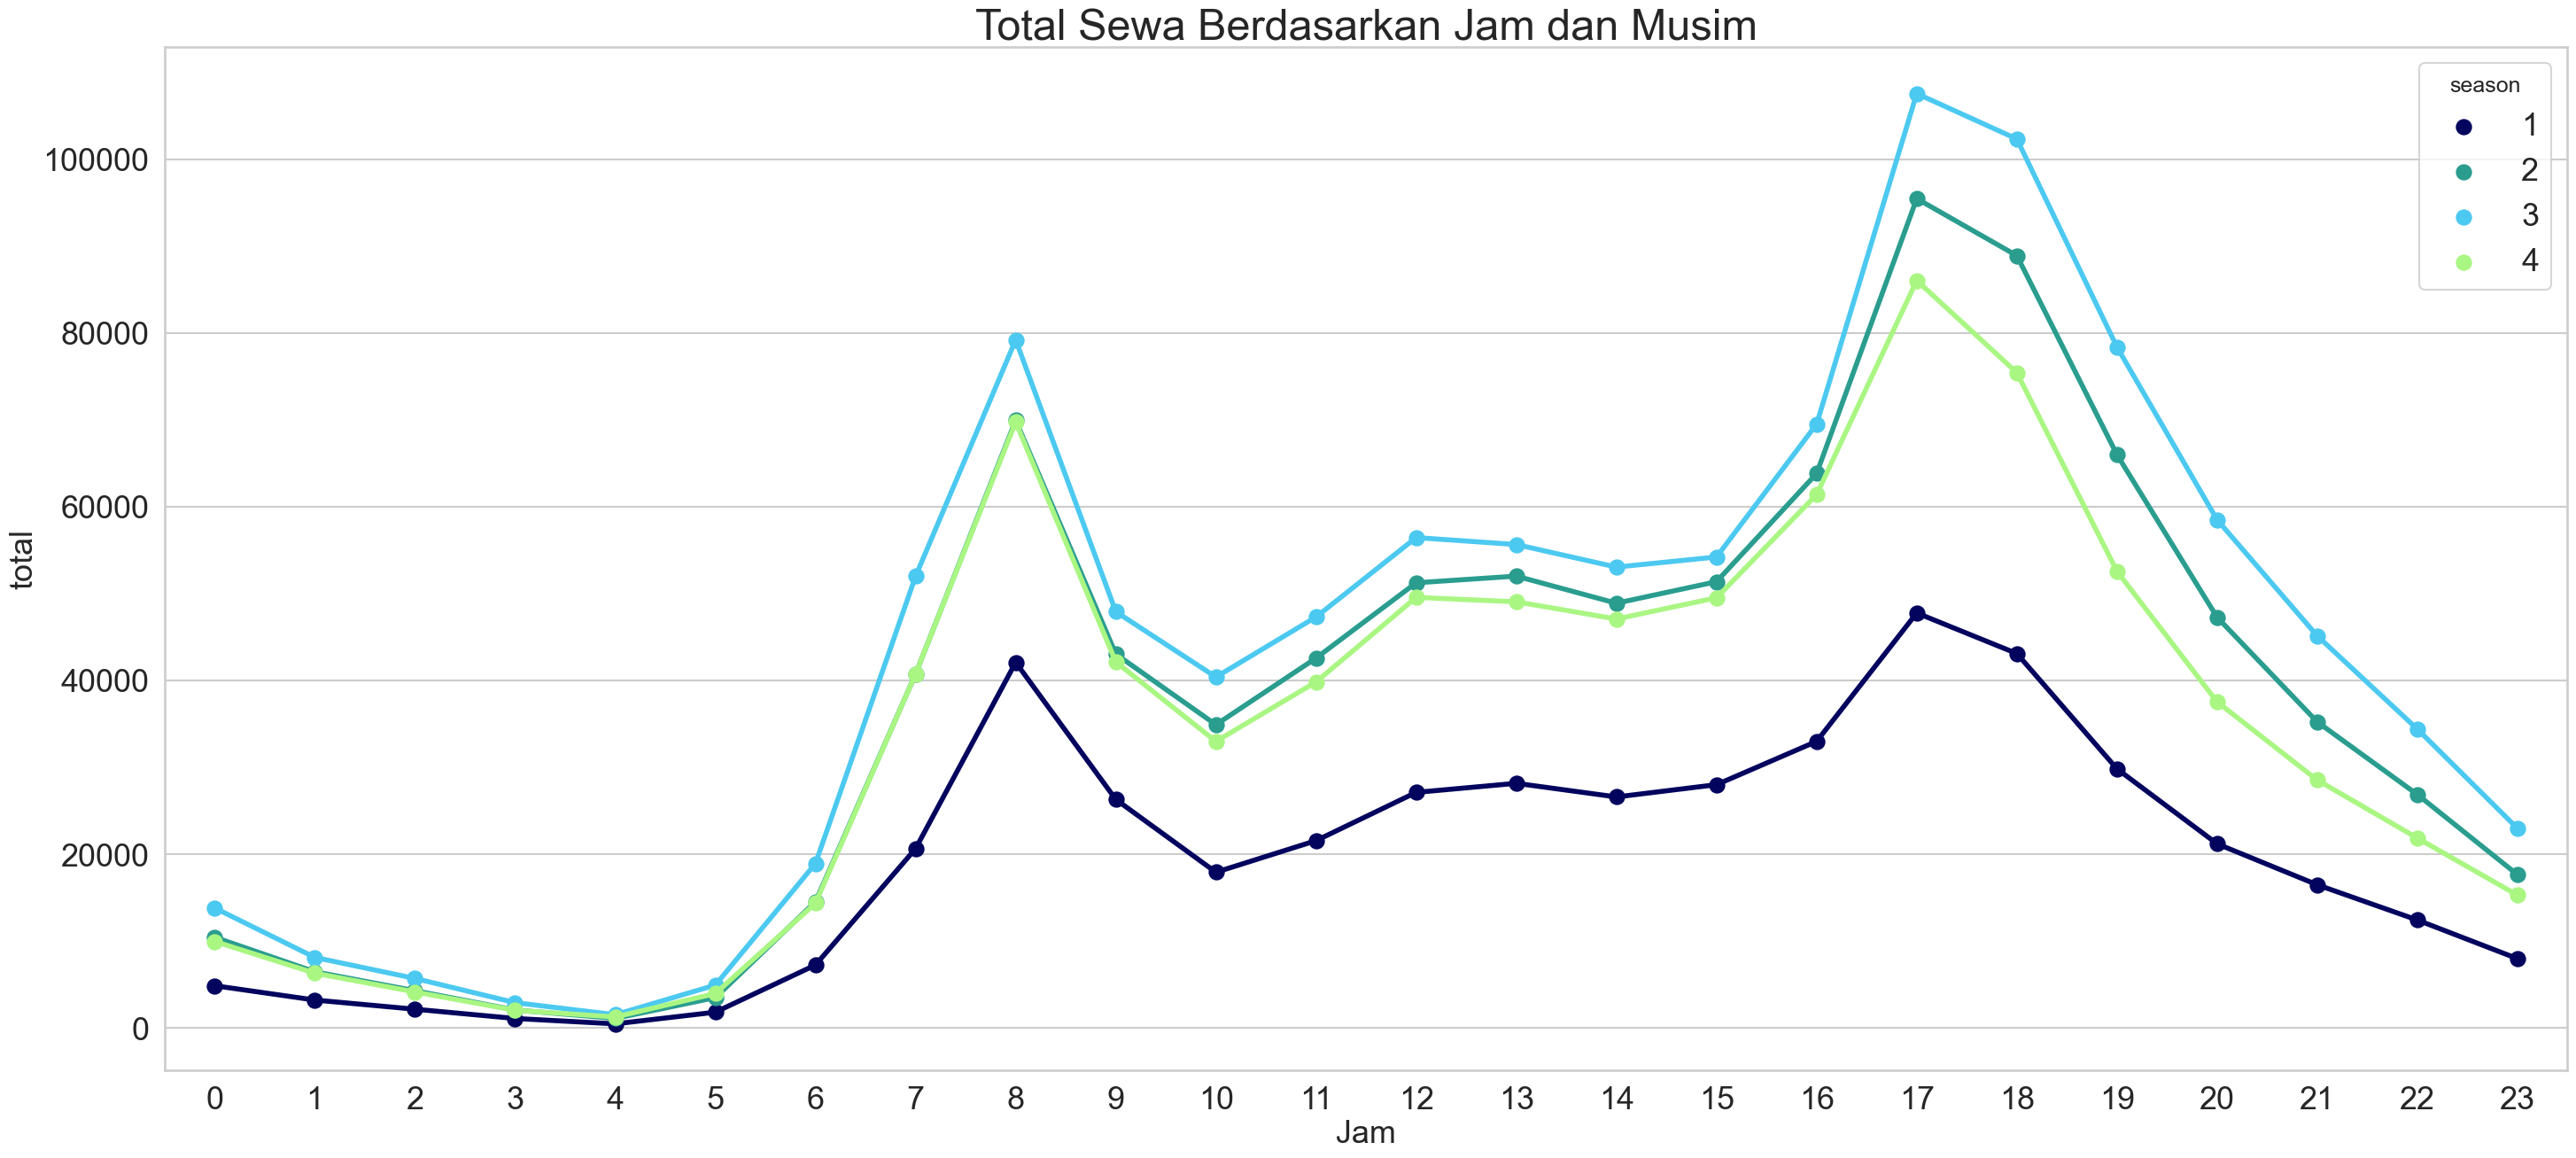

In [281]:
fig,ax = plt.subplots()

sns.pointplot(data=hour_df.groupby(by=[hour_df["hour"], hour_df['season']]).agg({
                "total": "sum"
                }).reset_index(),
              x='hour',
              y='total',
              hue='season',
              palette=season_colors,
              ax=ax)

ax.set_title('Total Sewa Berdasarkan Jam dan Musim', fontsize=35)
ax.set_xlabel('Jam')

### Pertanyaan 6:

Apakah ada peningkatan antara total penyewaan sepeda pada tahun 2011 dan 2012?

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '1.2431e+06'), Text(0, 0, '2.04958e+06')]

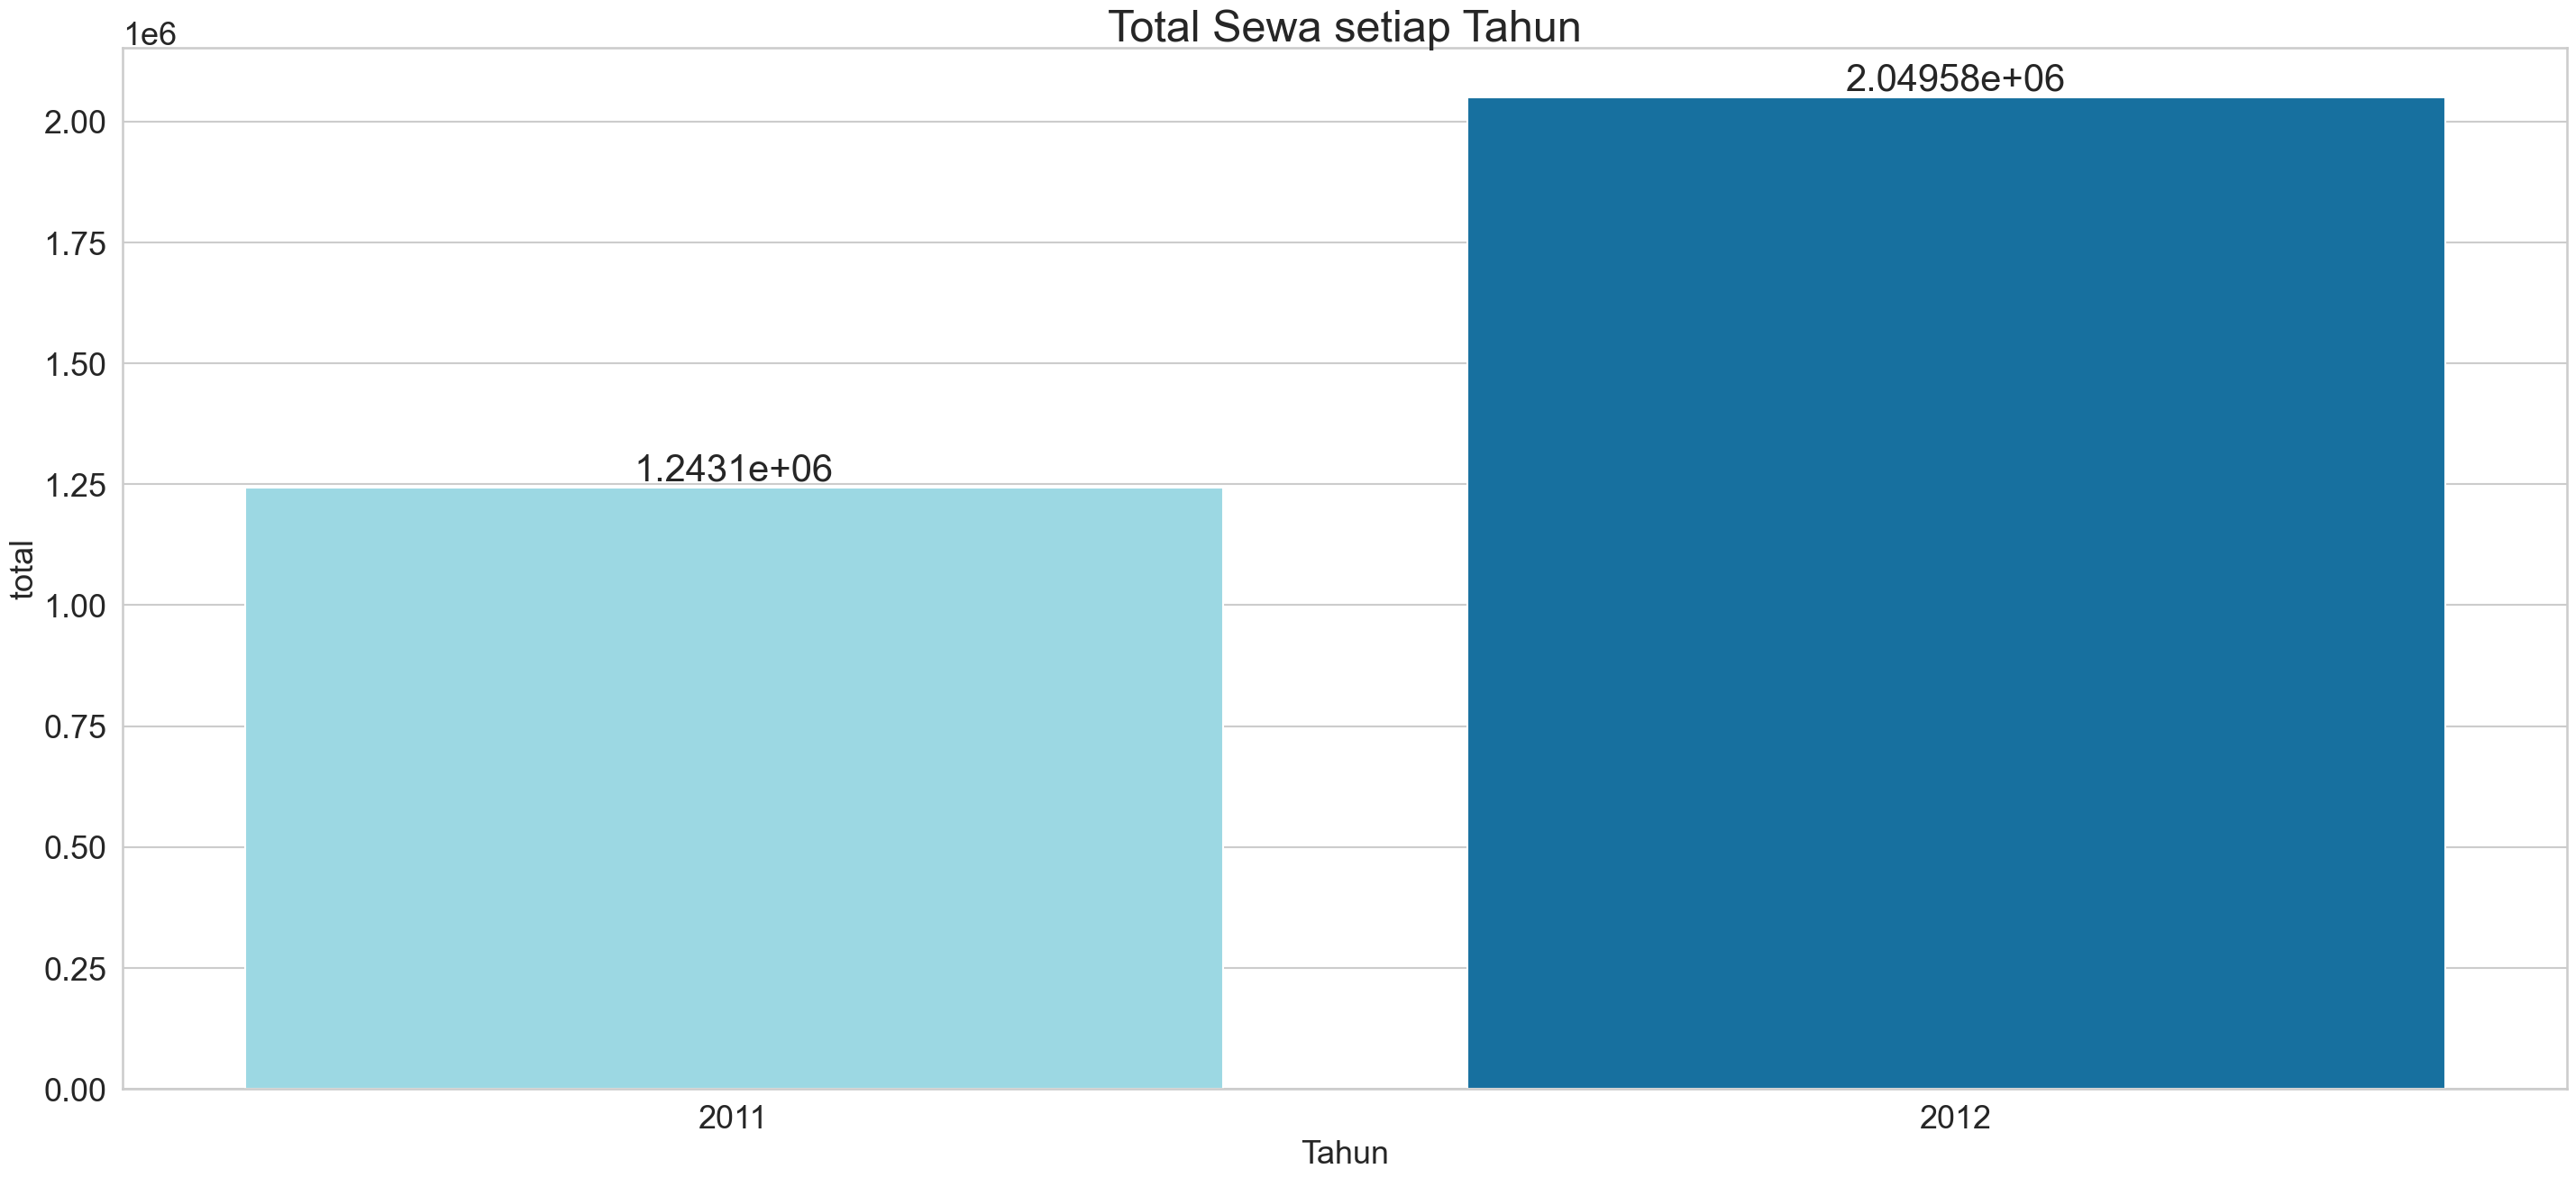

In [282]:
fig, ax = plt.subplots()
sns.barplot(data=hour_df.groupby(by=hour_df["datetime"].dt.year.astype(str)).agg({
            'total': 'sum'
            }).reset_index(),
            x='datetime',
            y='total',
            palette=date_colors,
            ax=ax
            )

ax.set_title('Total Sewa setiap Tahun', fontsize=35)
ax.set_xlabel('Tahun')
ax.bar_label(ax.containers[0], fontsize=30)

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'tanggal')

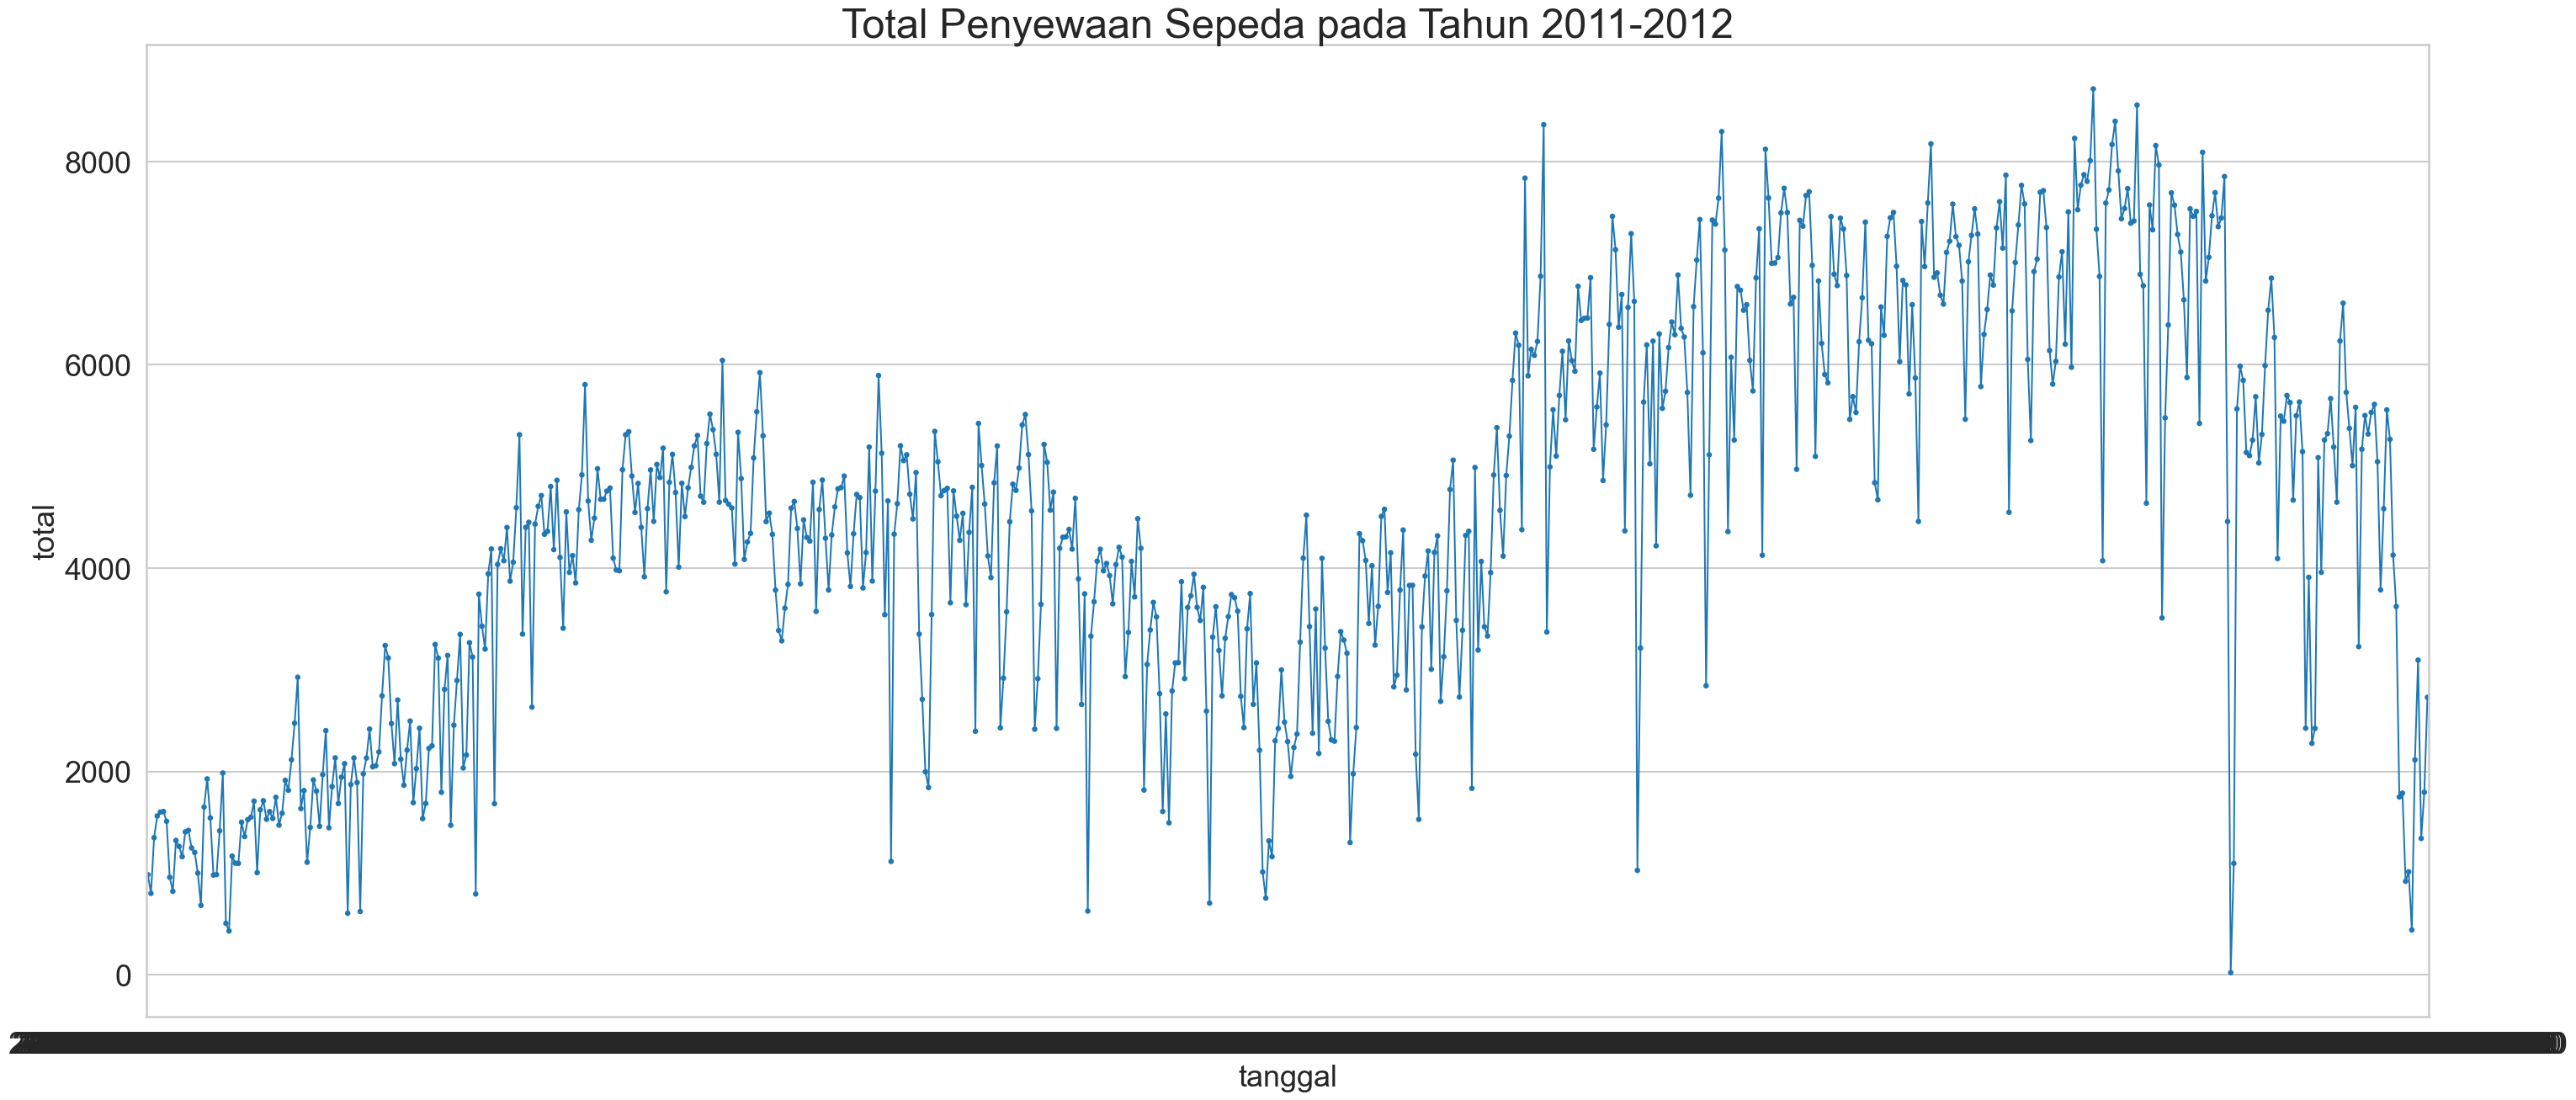

In [283]:
fig, ax = plt.subplots()
with plt.rc_context({'lines.linewidth': 0.8}):
    sns.pointplot(data=hour_df.groupby(by='datetime').agg({
                'total': 'sum'
                }).reset_index(),
                x='datetime',
                y='total',
                ax=ax)

ax.set_title('Total Penyewaan Sepeda pada Tahun 2011-2012', fontsize=35)
ax.set_xlabel('tanggal')

### Pertanyaan 7:
Apakah faktor lain seperti bulan, hari dalam seminggu, jam dalam sehari, atau bahkan hari libur dapat mempengaruhi tingkat penyewaan sepeda? 

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Bulan')

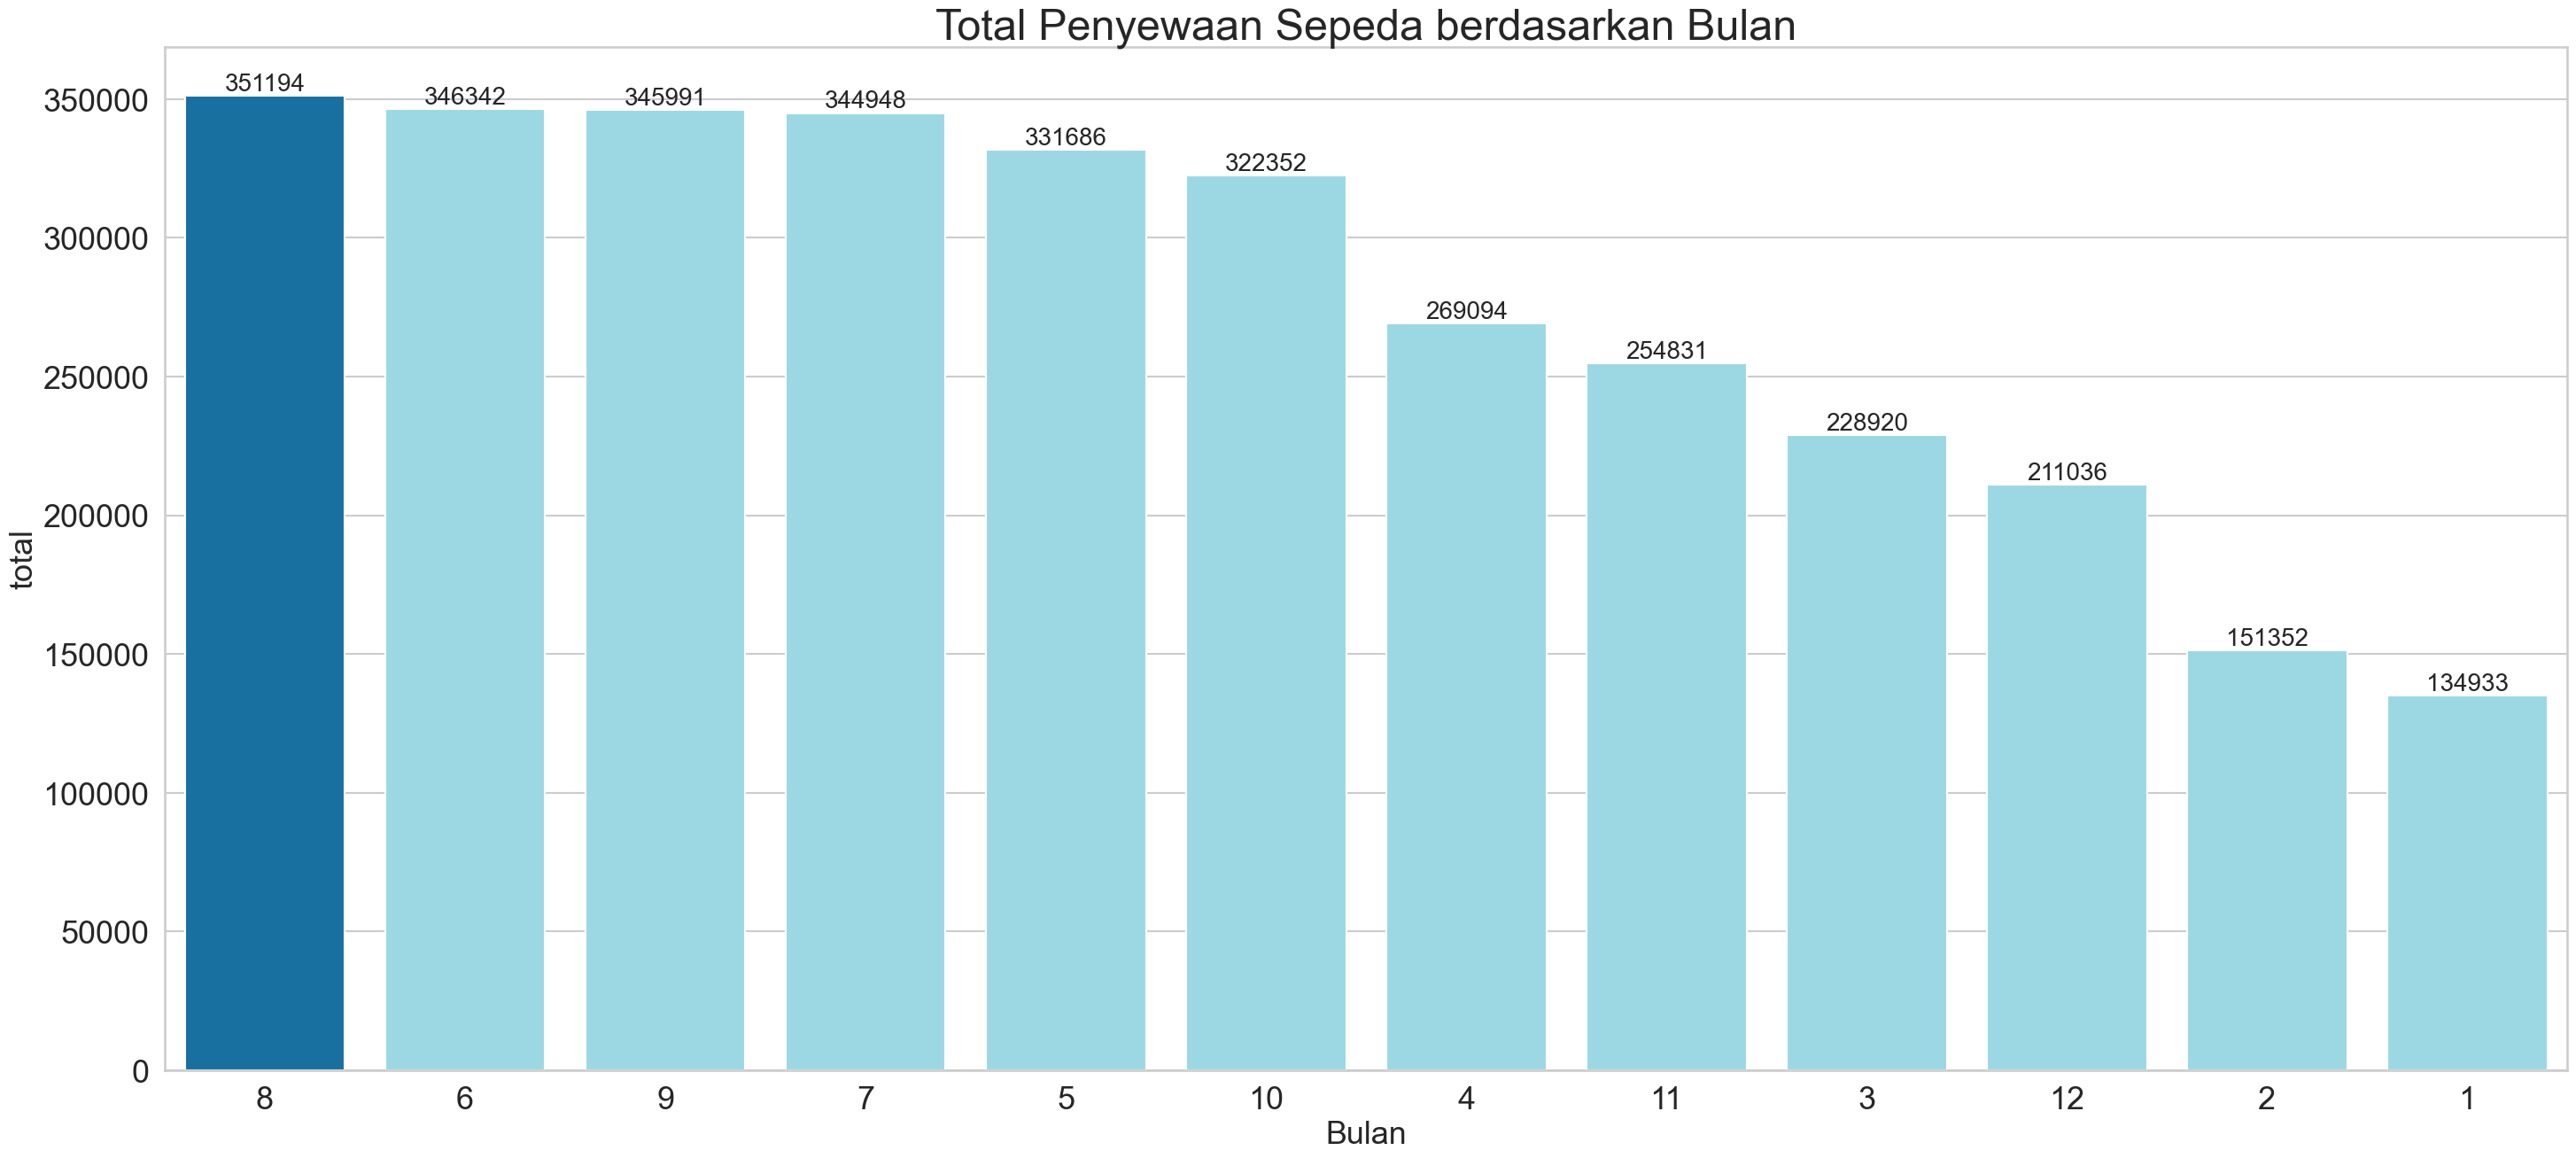

In [284]:
fig, ax = plt.subplots()
sns.barplot(data=hour_df.groupby(by=hour_df["datetime"].dt.month.astype(str)).agg({
            'total': 'sum'
            }).sort_values(by="total", ascending=False).reset_index(),
            x='datetime',
            y='total',
            palette=colors_a,
            ax=ax)

ax.set_title('Total Penyewaan Sepeda berdasarkan Bulan', fontsize=35)
ax.bar_label(ax.containers[0], fontsize=20)
ax.set_xlabel('Bulan')

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Jam')

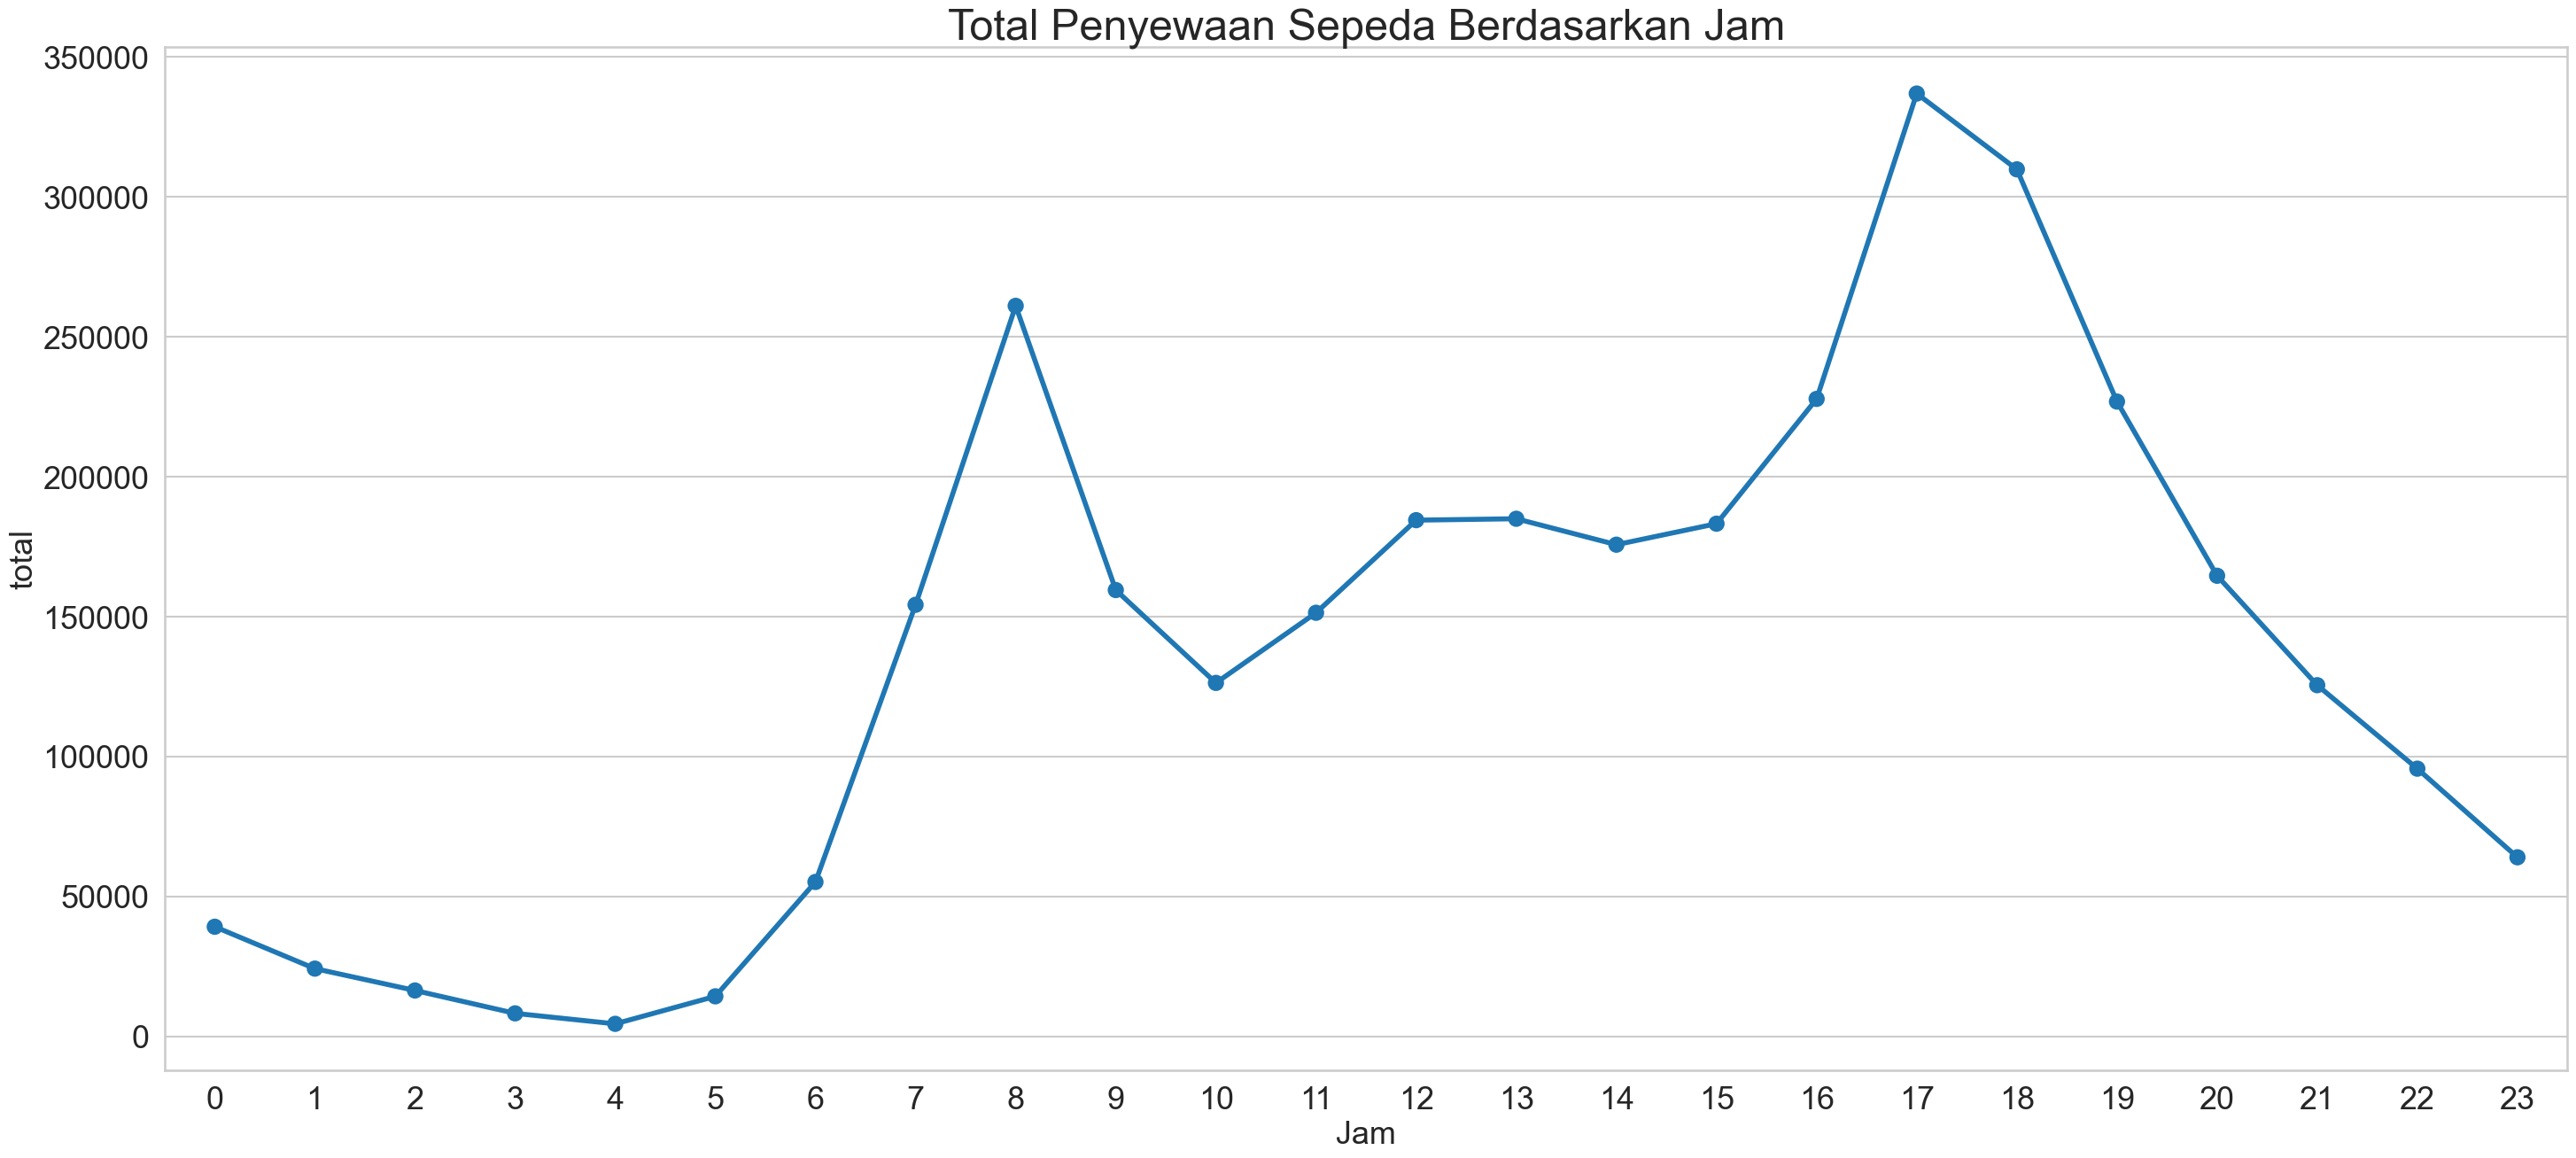

In [285]:
fig, ax = plt.subplots()
sns.pointplot(data=hour_df.groupby(by='hour').agg({
                'total': 'sum'
                }).reset_index(),
                x='hour',
                y='total',
                ax=ax)

ax.set_title('Total Penyewaan Sepeda Berdasarkan Jam', fontsize=35)
ax.set_xlabel('Jam')

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

Text(0.5, 0, 'Jam')

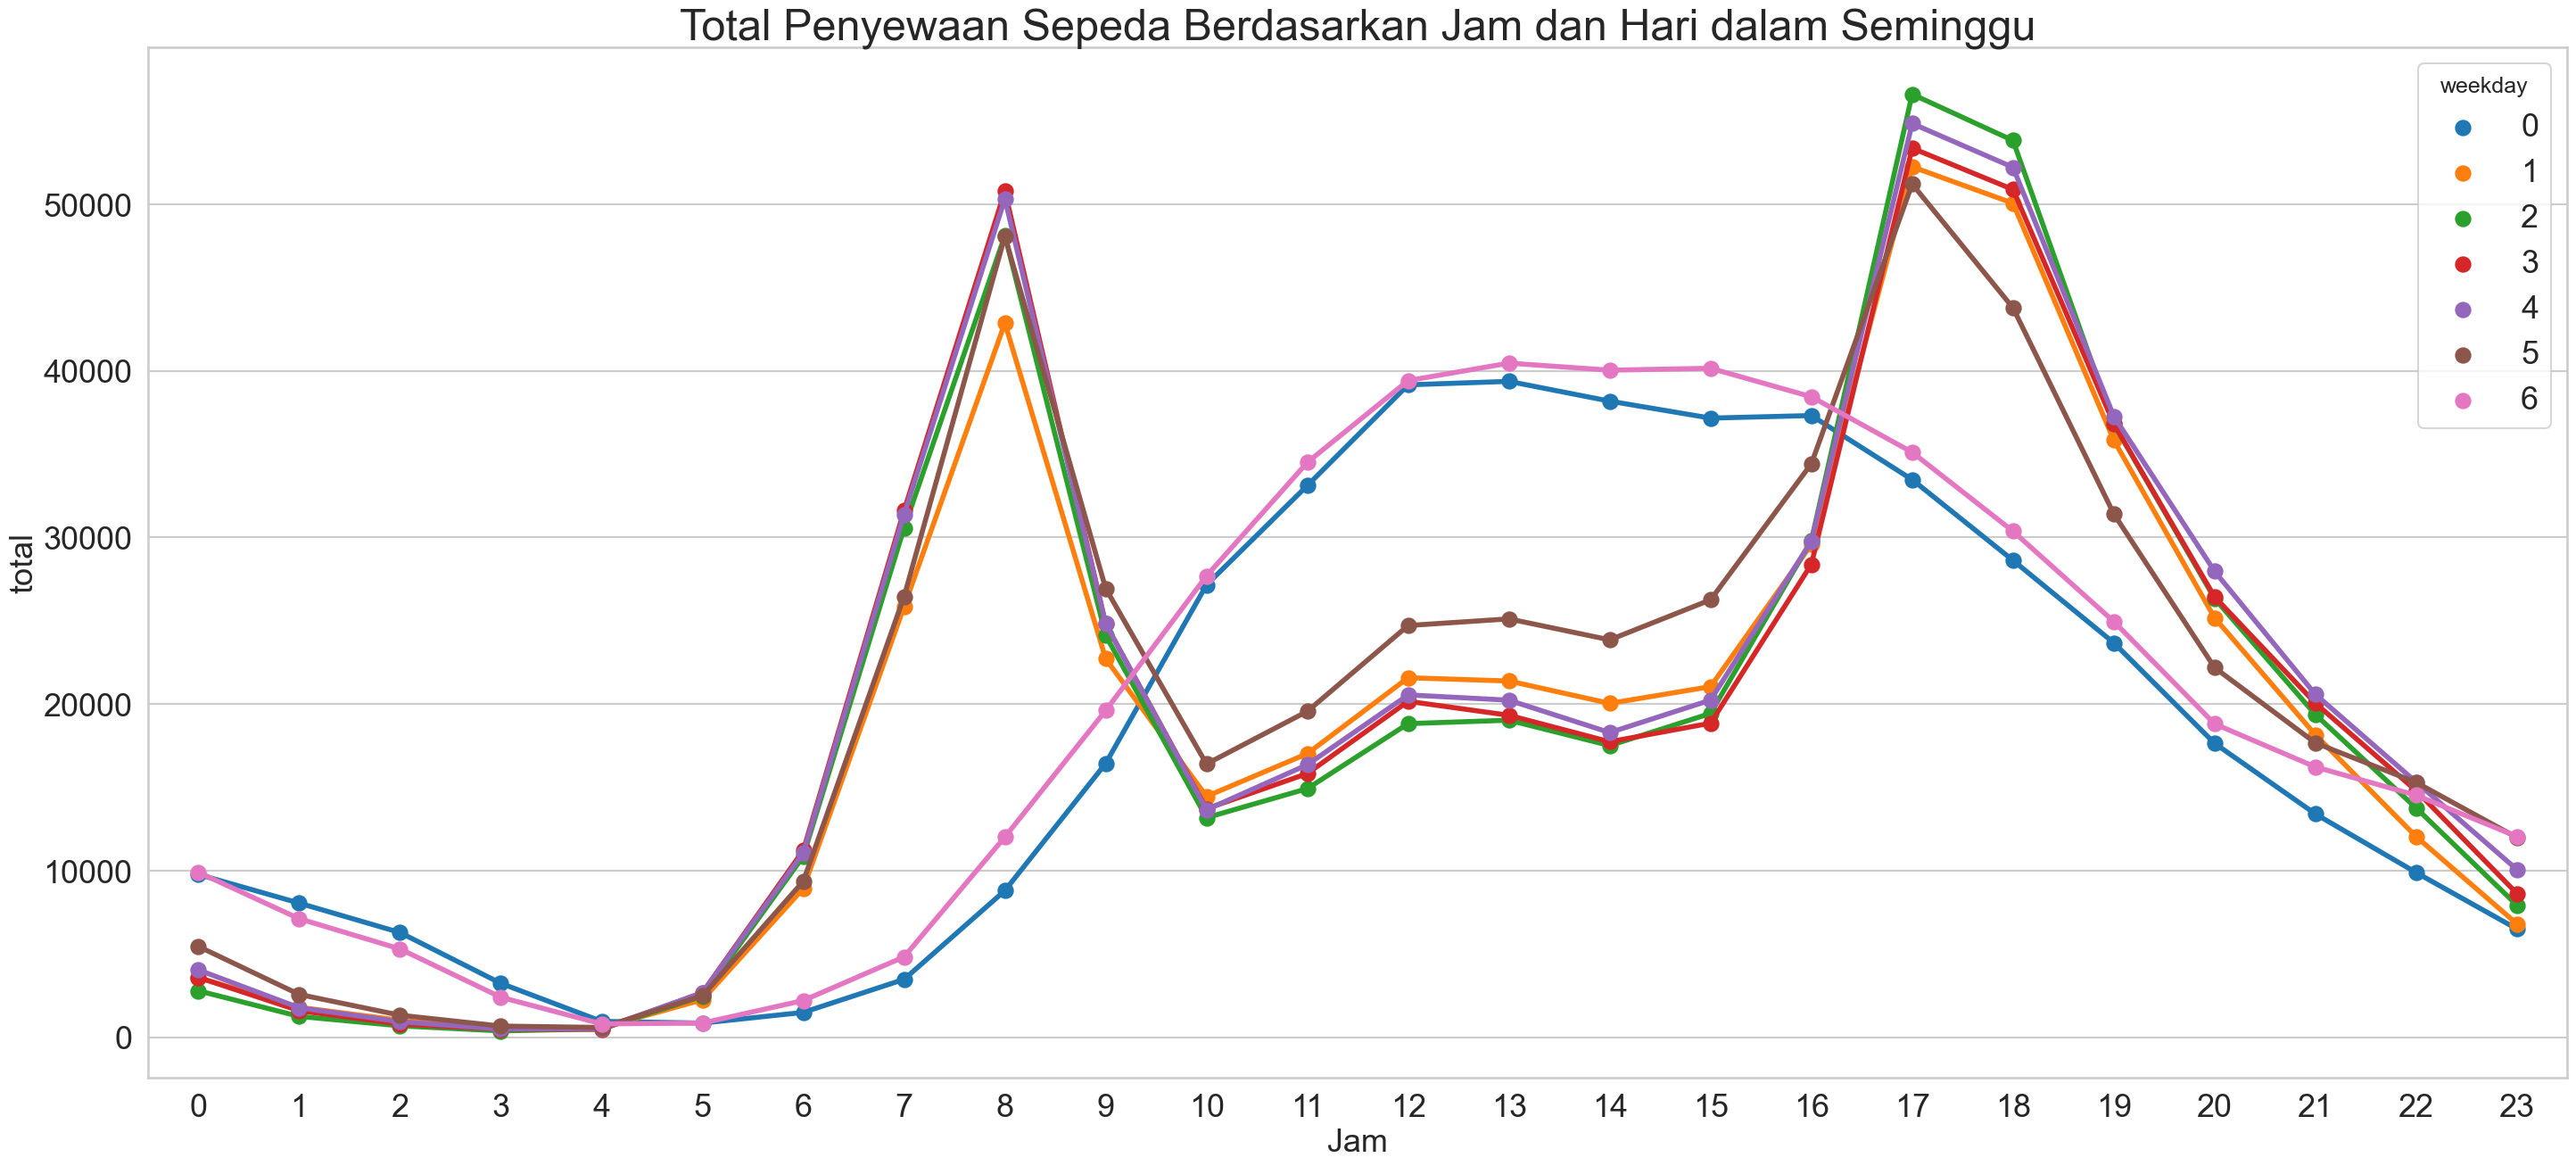

In [286]:
fig, ax = plt.subplots()
sns.pointplot(data=hour_df.groupby(by=[hour_df['hour'], hour_df['weekday']]).agg({
                'total': 'sum'
                }).reset_index(),
                x='hour',
                y='total',
                hue='weekday',
                ax=ax)

ax.set_title('Total Penyewaan Sepeda Berdasarkan Jam dan Hari dalam Seminggu', fontsize=35)
ax.set_xlabel('Jam')

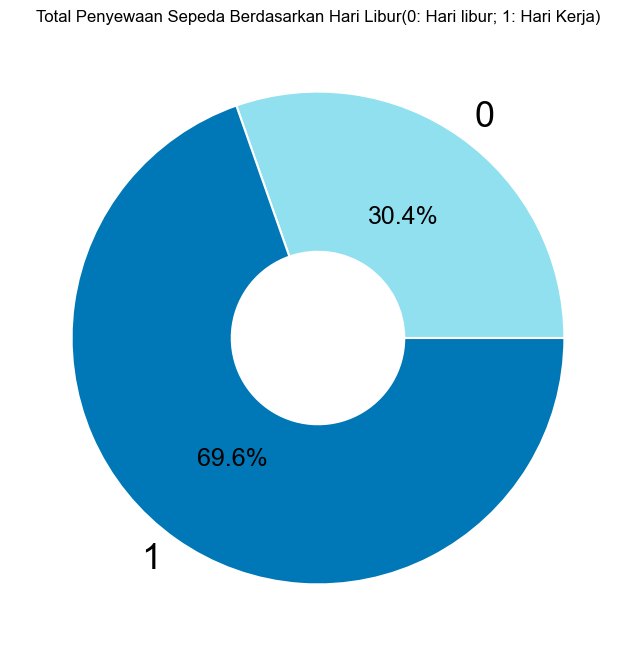

In [287]:
plt.figure(figsize=(15, 8))
plt.pie(
    data=hour_df.groupby(by=hour_df["workingday"]).agg({
    'total': 'sum'
    }).reset_index(),
    x='total',
    labels='workingday',
    colors = ("#90E0EF", "#0077B6"),
    wedgeprops={'width': 0.65},
    textprops={'color':"black"},
    autopct='%1.1f%%'
)

plt.title("Total Penyewaan Sepeda Berdasarkan Hari Libur(0: Hari libur; 1: Hari Kerja)", loc="center", fontsize=12, color='black')
plt.show()

### Pertanyaan 8:
Apakah ada pengaruh antara variabel dependen (kolom total) dan variabel independen (temperature, kelembapan, dan kec. angin)?

Untuk menjawab pertanyaan ini perlu dilakukan uji analisis lanjutan untuk mengetahui hubungan antar variabel di atas

#### Analisis Lanjutan Uji Statistik Parametrik/Non-Parametrik

Analisis statistika dapat dibagi menjadi dua kategori utama, yaitu parametrik dan non-parametrik. Pemilihan antara keduanya tergantung pada asumsi data dan tujuan analisis.

**Statistika Parametrik**:
1. Asumsi: Uji parametrik memerlukan asumsi tentang distribusi data, seperti distribusi normal. Selain itu, mereka sering memiliki asumsi tentang homogenitas varians.

2. Contoh Uji Parametrik:
- Uji Korelasi Pearson: Digunakan untuk melihat hubungan antar variabel ketika asumsi distribusi normal terpenuhi
- Uji T (Student's t-test): Digunakan untuk membandingkan rata-rata antara dua kelompok.
- Analisis Ragam (ANOVA): Digunakan untuk membandingkan rata-rata antara tiga atau lebih kelompok.
- Regresi Linear: Digunakan untuk memodelkan hubungan linier antara variabel dependen dan independen.

3. Keuntungan Parametrik: Lebih kuat dan efisien dalam mendeteksi perbedaan atau hubungan (jika asumsi terpenuhi).

**Statistika Non-Parametrik**:
1. Asumsi: Uji non-parametrik lebih fleksibel karena tidak memerlukan asumsi khusus tentang distribusi data. Mereka dapat digunakan ketika data tidak mengikuti distribusi normal atau asumsi lainnya tidak terpenuhi.

2. Contoh Uji Non-Parametrik:
- Uji Korelasi Spearman & Kendall : Digunakan untuk melihat hubungan antar variabel ketika asumsi distribusi normal tidak terpenuhi
- Uji U Mann-Whitney: Alternatif untuk uji T ketika asumsi distribusi normal tidak terpenuhi.
- Uji Kruskal-Wallis: Alternatif untuk ANOVA ketika asumsi distribusi normal atau homogenitas varians tidak terpenuhi.
- Uji Wilcoxon (Tanda Tunggal) dan Uji McNemar: Alternatif untuk uji T dan uji chi-kuadrat untuk data berpasangan.
3. Keuntungan Non-Parametrik: Tahan terhadap pelanggaran asumsi distribusi dan dapat digunakan untuk data ordinal atau data dengan skala yang lebih rendah.

Namun, perlu dicatat bahwa uji non-parametrik dilakukan jika asumsi-asumsi parametrik tidak dapat dipenuhi. Pemilihan antara uji parametrik dan non-parametrik sebaiknya didasarkan pada karakteristik data dan pertimbangan asumsi. Oleh karena itu, dibawah ini akan dilakukan uji asumsi untuk melihat apakah data termasuk parametrik atau non-parametrik.

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

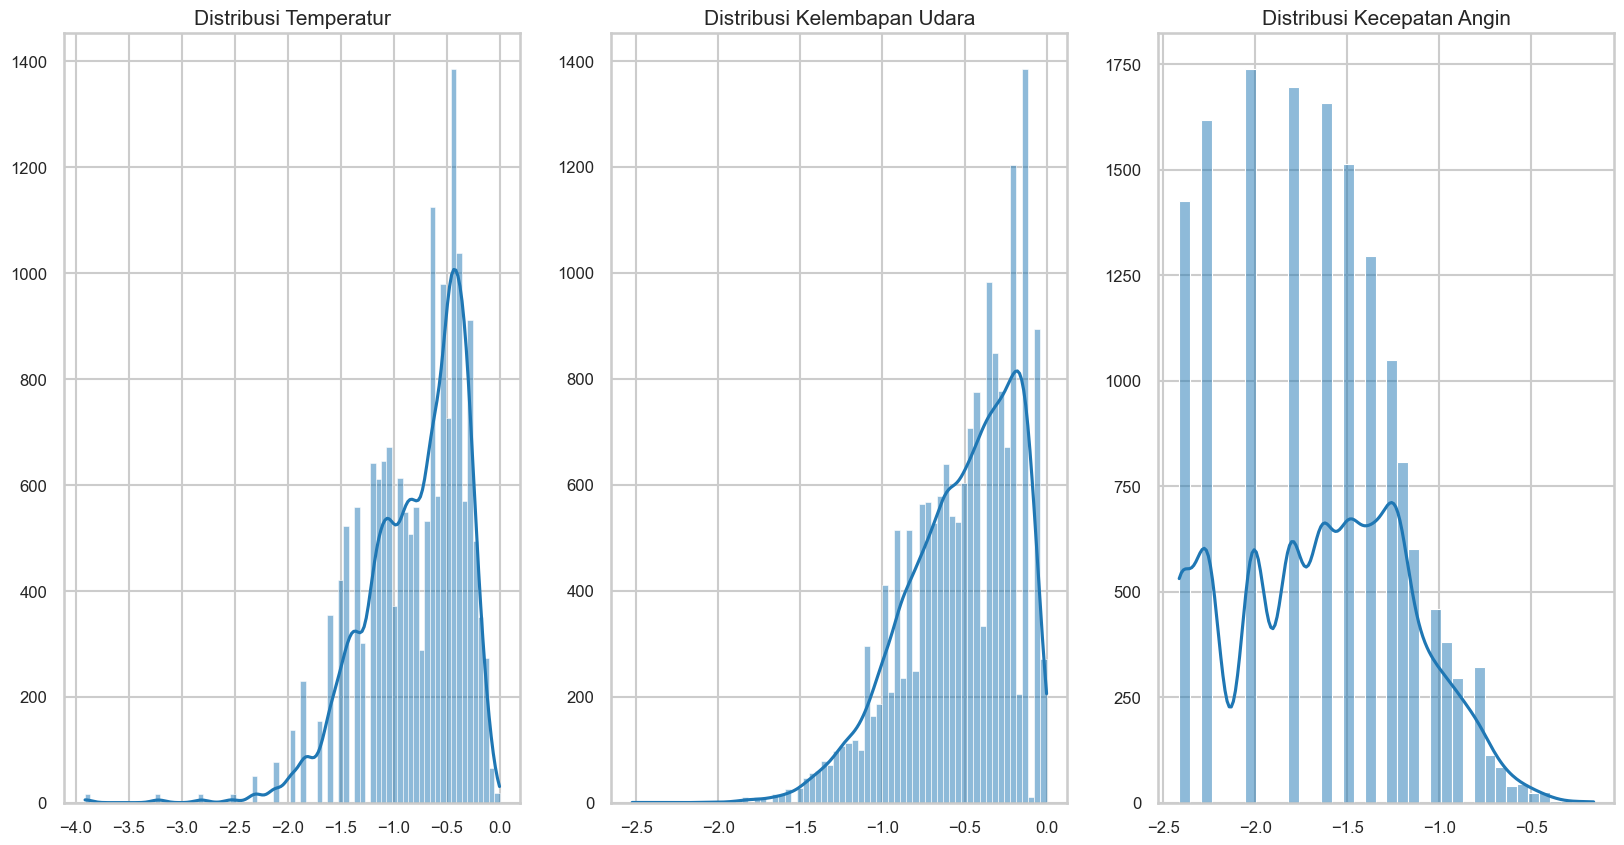

In [288]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10)) 

# melihat distribusi temperatur 
sns.histplot(data=np.log(hour_df['temp']),
            kde=True,
            ax=ax[0])

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Distribusi Temperatur", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
ax[0].tick_params(axis ='x', labelsize=12)

# melihat distribusi kelembapan udara
sns.histplot(data=np.log(hour_df['hum']),
            kde=True,
            ax=ax[1])

ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Distribusi Kelembapan Udara", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)
ax[1].tick_params(axis ='x', labelsize=12)

# melihat distribusi kec. angin
sns.histplot(data=np.log(hour_df['windspeed']),
            kde=True,
            ax=ax[2])

ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Distribusi Kecepatan Angin", loc="center", fontsize=15)
ax[2].tick_params(axis ='y', labelsize=12)
ax[2].tick_params(axis ='x', labelsize=12)

plt.show()

C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


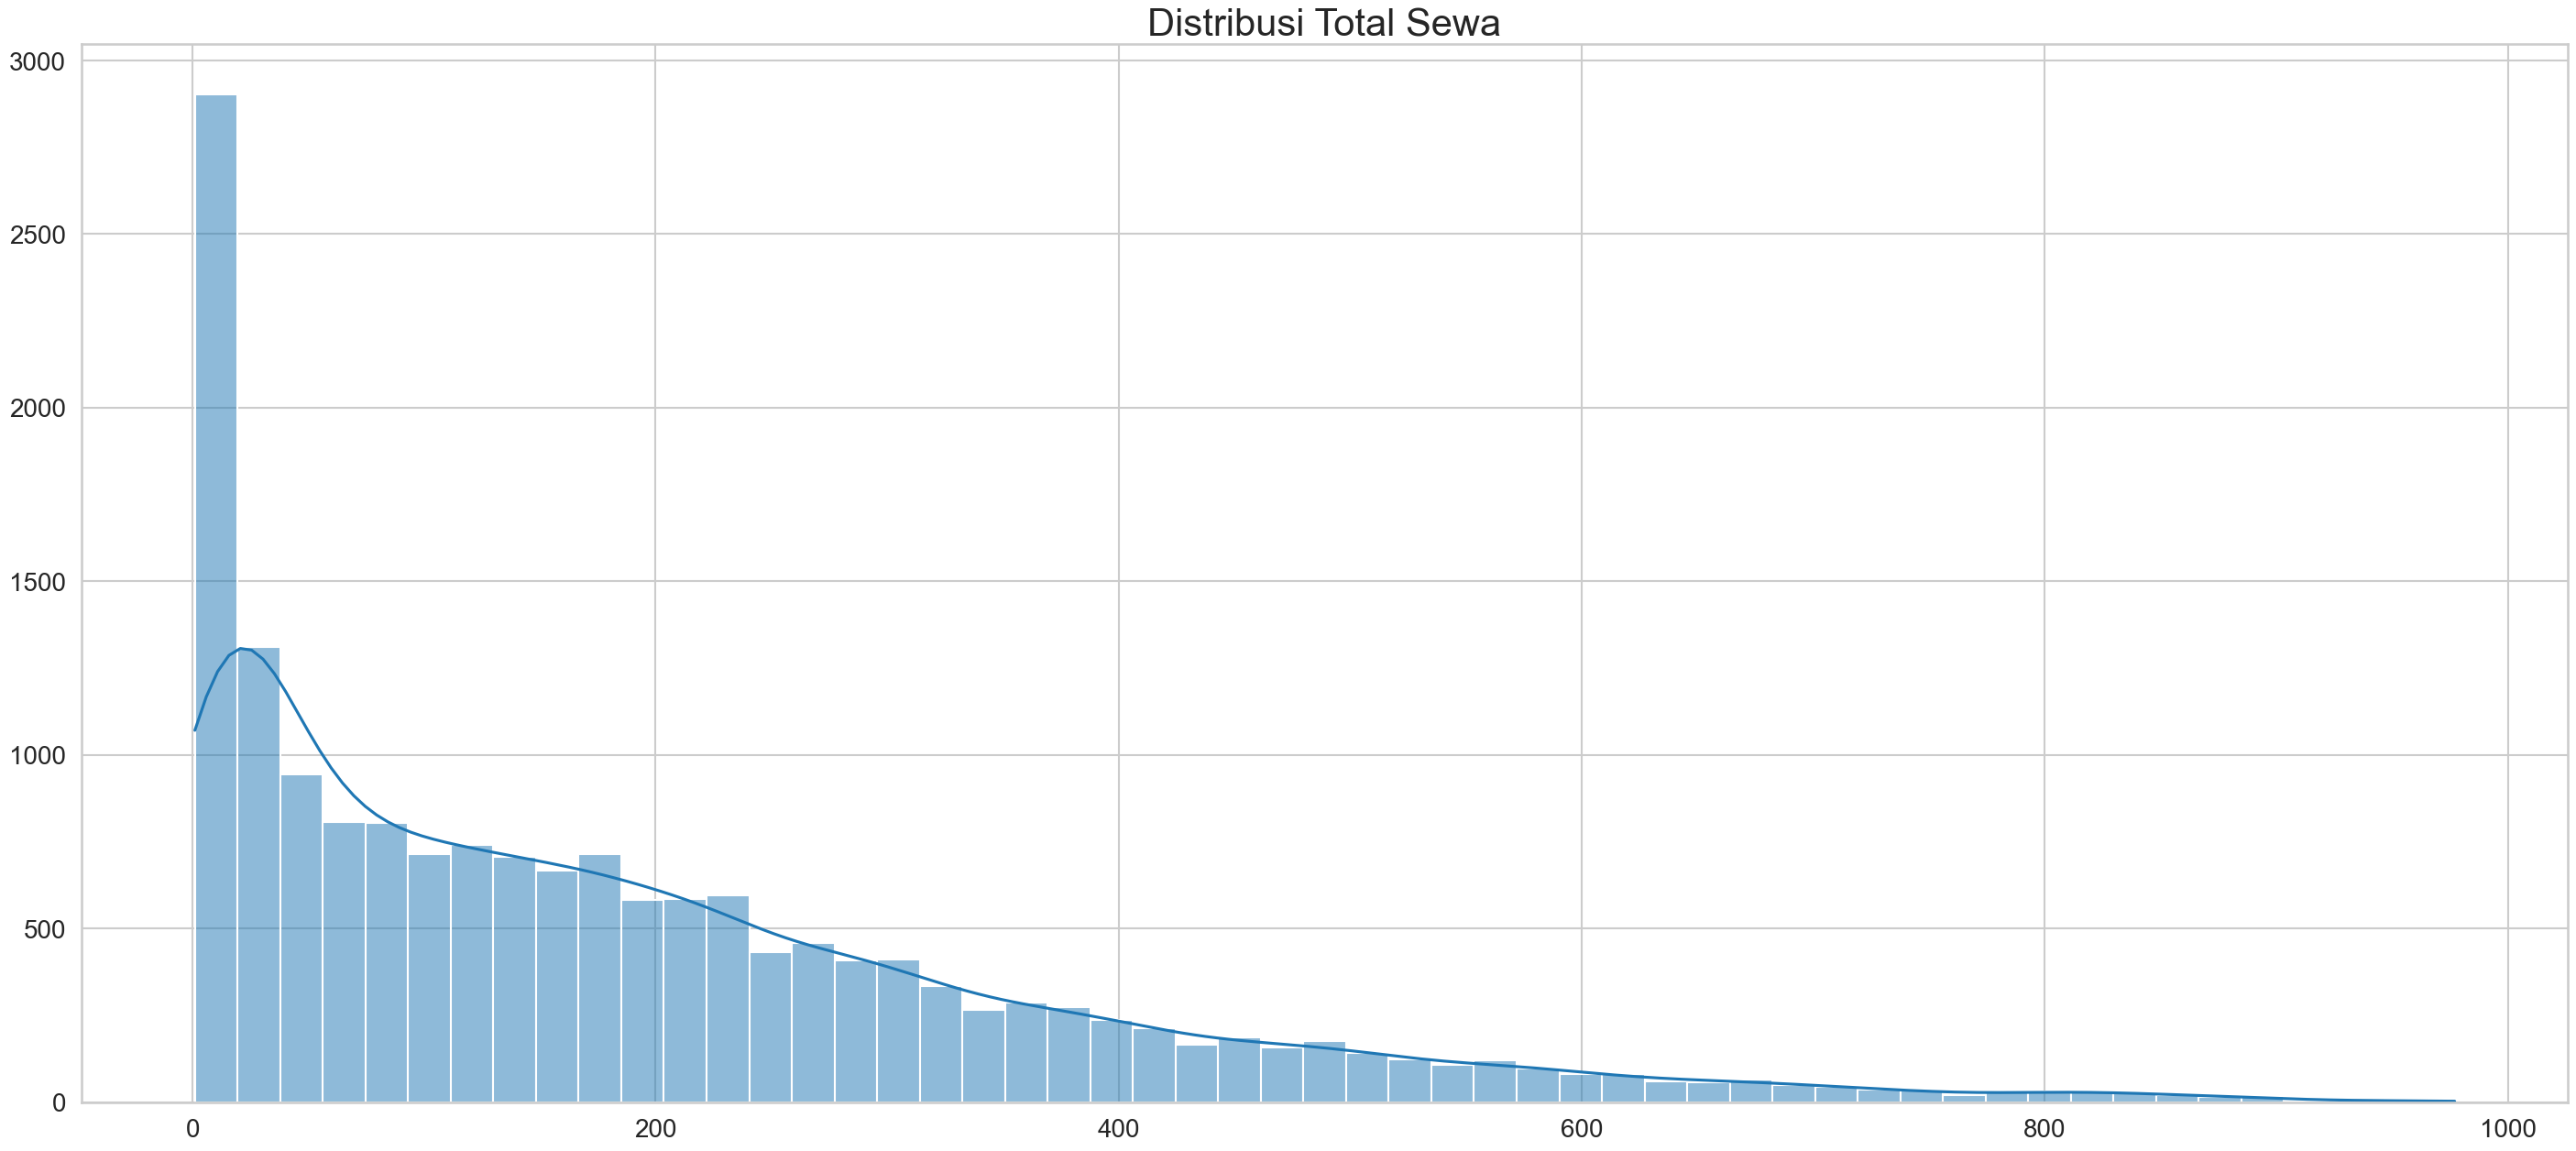

In [289]:
fig, ax = plt.subplots()

# melihat distribusi variabel total
sns.histplot(data=hour_df,
            x='total',
            kde=True,
            ax=ax)

ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Distribusi Total Sewa", loc="center", fontsize=30)
ax.tick_params(axis ='y', labelsize=20)
ax.tick_params(axis ='x', labelsize=20)

plt.show()

#### Uji Distribusi Normal

$H0$: data berdistribusi normal

$H1$: data tidak berdistribusi normal

H0 ditolak jika nilai `p-value < 0.05`

In [290]:
stat, p = stats.jarque_bera(hour_df['total'])
stat, p

p_value = 'Normal Distributon' if p >= 0.5 else 'Not Normal Distribution'
print(f'p value is {round(p, 4)}, so data is {p_value}')

p value is 0.0, so data is Not Normal Distribution


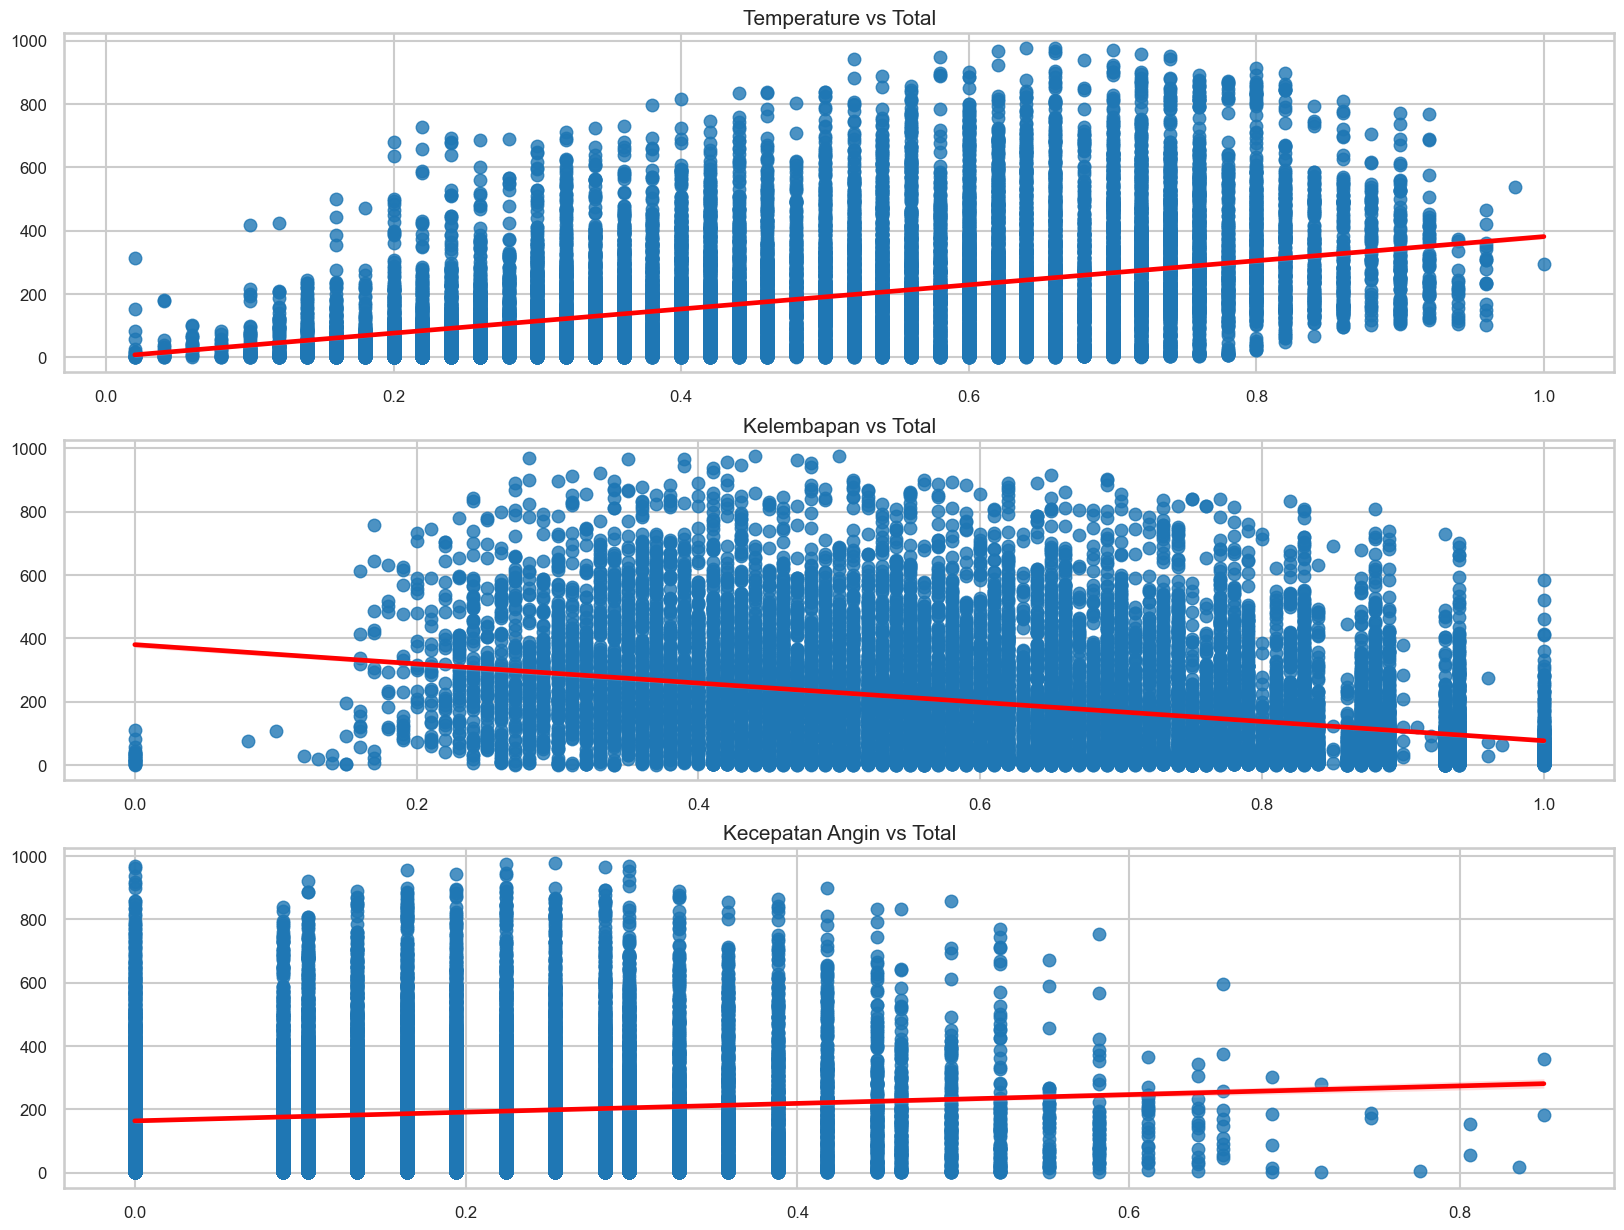

In [291]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 15)) 

# melihat hubungan variabel dependen (total) & variabel independen (temp)
sns.regplot(data=hour_df,
            x='temp',
            y='total',
            line_kws=dict(color="r"),
            ax=ax[0])

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Temperature vs Total", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
ax[0].tick_params(axis ='x', labelsize=12)

# melihat hubungan variabel dependen (total) & variabel independen (hum)
sns.regplot(data=hour_df,
            x='hum',
            y='total',
            line_kws=dict(color="r"),
            ax=ax[1])

ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Kelembapan vs Total", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)
ax[1].tick_params(axis ='x', labelsize=12)

# melihat hubungan variabel dependen (total) & variabel independen (windspeed)
sns.regplot(data=hour_df,
            x='windspeed',
            y='total',
            line_kws=dict(color="r"),
            ax=ax[2])

ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Kecepatan Angin vs Total", loc="center", fontsize=15)
ax[2].tick_params(axis ='y', labelsize=12)
ax[2].tick_params(axis ='x', labelsize=12)

plt.show()

<Axes: >

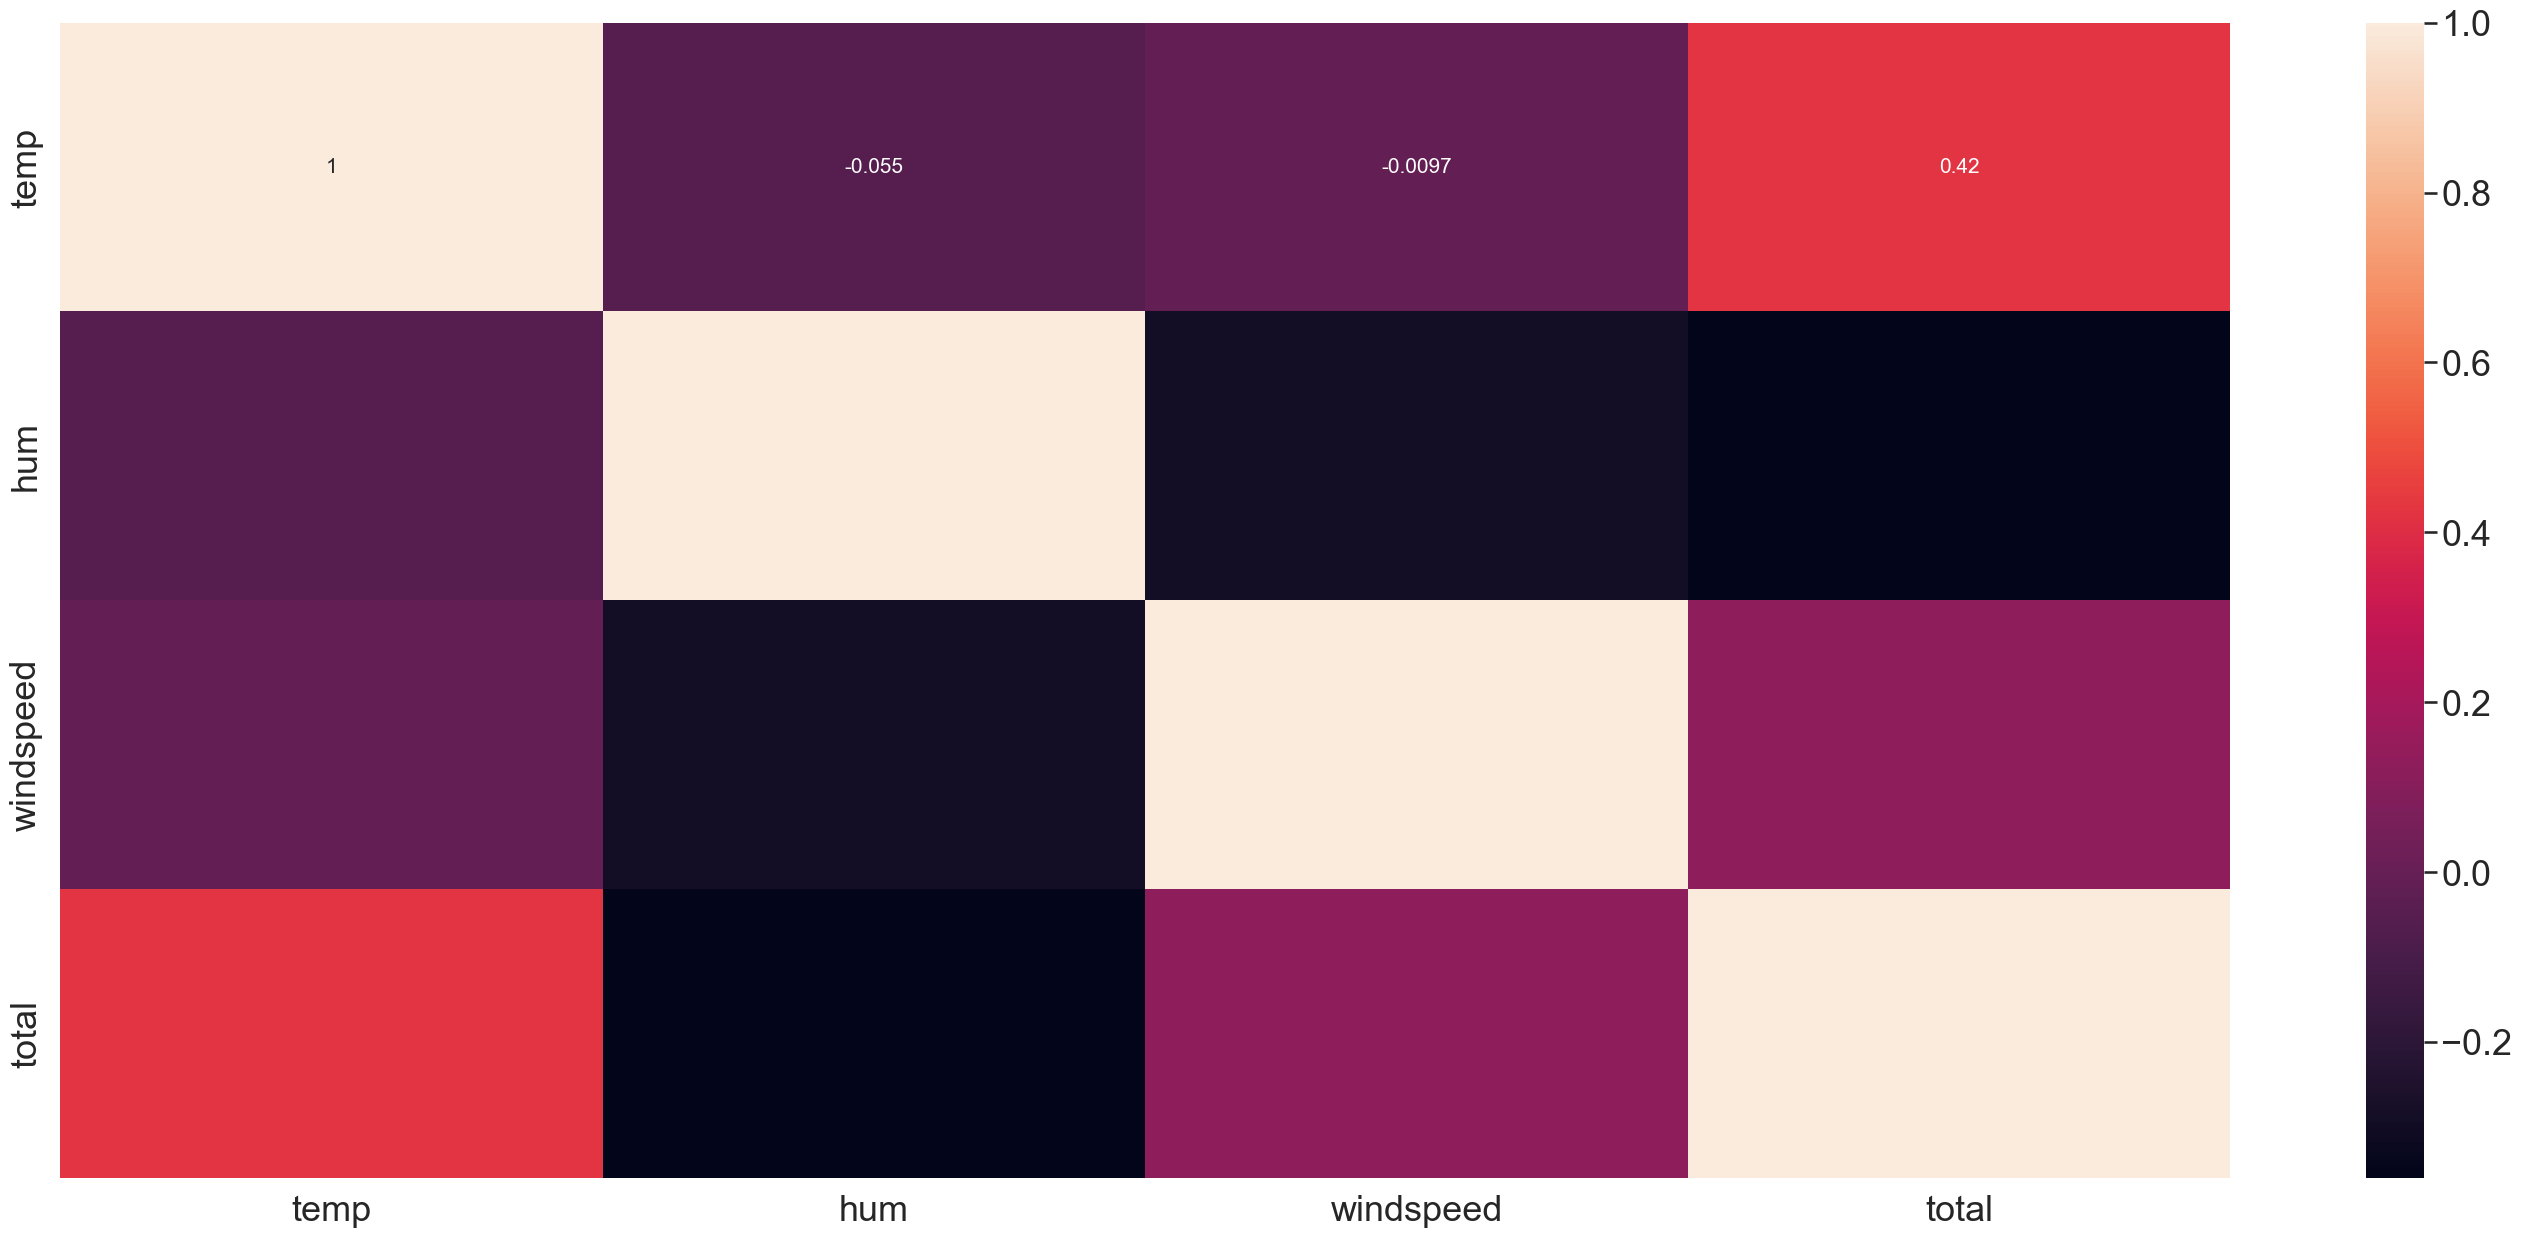

In [292]:
# menghitung nilai korelasi dengan metode spearman
corr = hour_df[['temp',
        'hum', 
        'windspeed', 
        'total']].corr(method='spearman')

fig, ax = plt.subplots()
sns.heatmap(data=corr,
                annot=True,
                annot_kws={'size': 15})

#### Uji Korelasi

$H0: \rho=0$ (variabel independen, tidak terdapat korelasi)

$H1: \rho$ ≠ 0

H0 ditolak apabila p-value < 0.05

In [293]:
stat, p = stats.spearmanr(hour_df.temp, hour_df.total)
print(stat, round(p, 4))

stat, p = stats.spearmanr(hour_df.hum, hour_df.total)
print(stat, round(p, 4))

stat, p = stats.spearmanr(hour_df.windspeed, hour_df.total)
print(stat, round(p, 4))

0.4233295244770643 0.0
-0.359614188399031 0.0
0.12662883138376593 0.0


## Conclusion

### Kesimpulan pertanyaan 1 :
- Kondisi cuaca mempengaruhi jumlah penyewaan sepeda, dimana kondisi cuaca **1(Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan)** memiliki jumlah penyewaan sepeda terbanyak dengan total **lebih dari 2.3juta kali sewa**, lalu kondisi **cuaca 2(Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut)** memiliki jumlah penyewaan terbanyak kedua dengan total **795.952 kali sewa**, dan di urutan ketiga ada kondisi **cuaca 3(Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan)** degan **total 158.331** kali sewa, sedangkan kondisi **cuaca 4(Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut)** memiliki jumlah sewa paling sedikit yaitu hanya **223 kali sewa**.

### Kesimpulan pertanyaan 2:
- Kondisi ekstrem sangat mempengaruhi jumlah penyewaan sepeda, terutama pada kondisi **cuaca 4(Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut)** dimana jumlah sewanya hanya **36** pada tahun **2011** dan **187** pada tahun **2012**

### Kesimpulan pertanyaan 3:
- Pada **kondisi cuaca 1** total sewa terbanyak terjadi pada bulan **Juni dan Juli**, lalu pada kondisi **cuaca 2 & 3** total sewa terbanyak terjadi pada bulan **Mei, September, dan Oktober**, sedangkan **kondisi cuaca 4** hanya terjadi penyewaan sepada pada bulan **Januari**.
- Pada **kondisi cuaca 1** total sewa terbanyak terjadi pada hari **Kamis, Sabtu dan Minggu**, lalu pada kondisi **cuaca 2** total sewa terbanyak terjadi pada hari **Senin dan Jum'at**, pada kondisi **cuaca 3** total sewa terbanyak terjadi pada hari **Selasa dan Rabu** sedangkan **kondisi cuaca 4** tidak perlu dilakukan analisis karena tidak berpengaruh signifikan terhadap profit perusahaan.
- Sacara keseluruhan, pada semua musim, terjadi **peningkatan order** penyewaan sepeda oleh customer pada **pagi hari (pukul 06.00-08.00)** dan pada **sore hari (pukul 16.00-18.00)**.

### Kesimpulan pertanyaan 4 :

- Musim mempengaruhi jumlah penyewaan sepeda, dimana kondisi **Musim Gugur** memiliki jumlah penyewaan sepeda terbanyak dengan total **lebih dari 1juta kali sewa**, lalu **Musim Panas** memiliki jumlah penyewaan terbanyak kedua dengan total **918.589 kali sewa**, dan di urutan ketiga yaitu **Musim dingin** degan **total 841.613** kali sewa, sedangkan **Musim Semi** memiliki jumlah sewa paling sedikit yaitu **471.348 kali sewa**. 

### Kesimpulan pertanyaan 5:
- Pada **Musim Semi** total sewa terbanyak terjadi pada hari **Kamis dan Jum'at**, lalu pada **Musim Panas** total sewa terbanyak terjadi pada hari **Kamis, Jum'at dan Sabtu**, pada **Musim Gugur** total sewa terbanyak terjadi pada hari **Rabu dan Kamis** sedangkan pada **Musim Dingin** total sewa terbanyak terjadi pada hari **Senin, Jum'at dan Sabtu**.
- Sacara keseluruhan, pada semua kondisi cuaca, terjadi **peningkatan order** penyewaan sepeda oleh customer pada **pagi hari (pukul 06.00-08.00)** dan pada **sore hari (pukul 16.00-18.00)**.

### Kesimpulan Pertanyaan 6 :
- Terjadi **kenaikan** total sewa sepeda pada 2012 sebesar **64.8%** menjadi **2.049.576** total sewa pada tahun 2012.
- Terjadi **kenaikan** yang signifikan pada bulan-bulan yang terjadi pada saat musim panas dan gugur lalu mengalami **penurunan** yang signifikan pada musim dingin dan musim semi setiap tahunya.


### Kesimpulan Pertanyaan 7:
- 5 bulan dengan total sewa **tertinggi** yaitu bulan **Agustus, September, Juni, Juli, dan Mei**.
- Saat ***weekday*** (Senin-Jum'at) terjadi **peningkatan** sewa sepeda yang signifikan pada pagi hari pukul **06.00-08.00** dan mengalami **penurunan** yang signifikan pada jam **09.00**, lalu mengalami **peningkatan** yang signifikan kembali pada sore hari pukul **16.00-17.00** dan mengalami **penurunan** yang signifikan setelah pukul **18.00**, sedangkan saat ***weekend*** (Sabtu-Minggu) terjadi **peningkatan** sewa sepeda secara perlahan mulai pukul **06.00-12.00** dan mengalami **penurunan** secara perlahan pada pukul **16.00**
- Pada **hari kerja** tingkat penyewaan sepeda **lebih banyak** dengan presentase **69.6%** dibandingkan pada saat **hari libur** yang presentasenya hanya **30.4%**.

### Kesimpulan Pertanyaan 8:
Pada Analisis uji lanjutan didapatkan hasil:
1. Distribusi variabel temperature, kelembapan udara, dan kecepatan angin dilihat pada plot histogram nya menujukan bahwa **data tidak berdistribusi normal**.
2. Distribusi variabel total sewa pada plot histogram menunjukan bahwa berdistribusi normal, setelah dilakukan uji statistik didapatkan bahwa H0 ditolak yang artinya **variabel total sewa tidak berdistribusi normal**.
3. Pada scatter plot variabel temperature, kelembapan udara, dan kecepatan angin terhadap variabel total **tidak begitu nampak adanya korelasi**.
4. Hasil **uji korelasi** dengan **metode spearman** menunjukan H0 ditolak yang artinya variabel temperature, kelembapan udara, dan kecepatan angin **memiliki korelasi terhadap variabel total**, metode spearman digunakan karena terdapat variabel yang tidak berdistribusi normal sehingga merupakan uji statistik non-parametrik.
5. Korelasi antara **temperatur dan total sewa** memiliki nilai **0.42** yang berarti memiliki **korelasi positif yang lemah**, Korelasi antara **kelembapan udara dan total sewa** memiliki nilai **-0.36** yang berarti memiliki **korelasi negatif yang lemah**, Korelasi antara **kecepatan angin dan total sewa** memiliki nilai **0.13** yang berarti memiliki **korelasi positif yang lemah**, sehingga disimpulkan ketiga variabel ini memiliki pengaruh terhadap total sewa sepeda namun **tidak berpengaruh secara signifikan**.

## Download Dataset yang sudah dibersihkan

In [294]:
hour_df.to_csv('hour_data.csv', index=False)